<a href="https://colab.research.google.com/github/Sachinthana-Pathiranage/Sri-Ayu-Ayurvedic-Care/blob/Pamoda/Notebooks/Pamoda_Notebooks/FESymptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib
import json
from google.colab import drive

In [ ]:
#load the dataset
data = pd.read_csv('/content/Disease_Prediction_dataset.csv')

# Understanding the dataset

In [ ]:
data.head(10)

,shivers,acidity,tiredness,weight_loss,lethargy,cough,high_fever,digestive_issues,headache,stomach_ache,...,phlegm,sinus_pressure,chest_pain,dizziness,overweight,weak_muscles,irritability,frequent_urination,vision_changes,prognosis
0,1,0,0,0,0,1,1,1,1,0,...,0,1,1,0,0,1,1,0,0,Migraine
1,0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,1,0,1,Migraine
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Migraine
3,1,1,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,Migraine
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,Migraine
5,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,1,1,1,Migraine
6,1,0,0,1,0,0,1,1,1,0,...,0,1,0,0,0,1,0,0,1,Migraine
7,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,1,1,0,0,Migraine
8,1,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,Migraine
9,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,Migraine


In [ ]:
data.tail(10)

,shivers,acidity,tiredness,weight_loss,lethargy,cough,high_fever,digestive_issues,headache,stomach_ache,...,phlegm,sinus_pressure,chest_pain,dizziness,overweight,weak_muscles,irritability,frequent_urination,vision_changes,prognosis
710,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,diabetes
711,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,diabetes
712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,diabetes
713,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,diabetes
714,0,0,1,1,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,diabetes
715,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,diabetes
716,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,diabetes
717,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,diabetes
718,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,diabetes
719,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,diabetes


In [ ]:
data.columns

Index(['shivers', 'acidity', 'tiredness', 'weight_loss', 'lethargy', 'cough',
       'high_fever', 'digestive_issues', 'headache', 'stomach_ache',
       'vomiting', 'loss_of_appetite', 'gnawing', 'upper_stomach_pain',
       'burning_ache', 'swelled_lymph_nodes', 'blurry_eyesight', 'phlegm',
       'sinus_pressure', 'chest_pain', 'dizziness', 'overweight',
       'weak_muscles', 'irritability', 'frequent_urination', 'vision_changes',
       'prognosis'],
      dtype='object')

In [ ]:
data.shape

(720, 27)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   shivers              720 non-null    int64 
 1   acidity              720 non-null    int64 
 2   tiredness            720 non-null    int64 
 3   weight_loss          720 non-null    int64 
 4   lethargy             720 non-null    int64 
 5   cough                720 non-null    int64 
 6   high_fever           720 non-null    int64 
 7   digestive_issues     720 non-null    int64 
 8   headache             720 non-null    int64 
 9   stomach_ache         720 non-null    int64 
 10  vomiting             720 non-null    int64 
 11  loss_of_appetite     720 non-null    int64 
 12  gnawing              720 non-null    int64 
 13  upper_stomach_pain   720 non-null    int64 
 14  burning_ache         720 non-null    int64 
 15  swelled_lymph_nodes  720 non-null    int64 
 16  blurry_e

**Checking for missing values**

In [ ]:
pd.isnull(obj=data).sum()

,0
shivers,0
acidity,0
tiredness,0
weight_loss,0
lethargy,0
cough,0
high_fever,0
digestive_issues,0
headache,0
stomach_ache,0


In [ ]:
data['prognosis'].unique()

array(['Migraine', 'Common_cold', 'gastritis', 'diabetes'], dtype=object)

In [ ]:
data['prognosis'].value_counts()

,count
prognosis,
Common_cold,200
Migraine,185
gastritis,179
diabetes,156


In [ ]:
data.describe()

,shivers,acidity,tiredness,weight_loss,lethargy,cough,high_fever,digestive_issues,headache,stomach_ache,...,blurry_eyesight,phlegm,sinus_pressure,chest_pain,dizziness,overweight,weak_muscles,irritability,frequent_urination,vision_changes
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.262500,0.341667,0.419444,0.119444,0.225000,0.222222,0.240278,0.272222,0.327778,0.193056,...,0.286111,0.226389,0.283333,0.319444,0.254167,0.205556,0.273611,0.125000,0.158333,0.247222
std,0.440299,0.474598,0.493811,0.324536,0.417873,0.416029,0.427549,0.445413,0.469730,0.394971,...,0.452256,0.418785,0.450930,0.466586,0.435694,0.404388,0.446122,0.330949,0.365307,0.431697
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Check for duplicates**

In [ ]:
# Check for duplicate rows
duplicates = data.duplicated()

# Count duplicates
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop duplicates
data = data.drop_duplicates()
print('Duplicate rows removed')

Number of duplicate rows: 7
Duplicate rows removed


In [ ]:
data.shape

(713, 27)

**Checking class distribution**

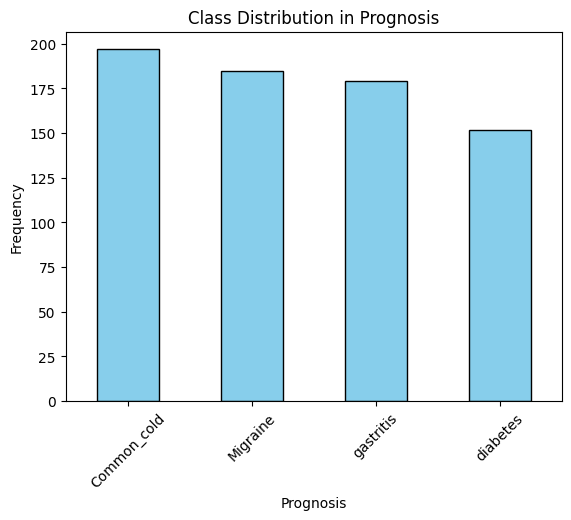

In [ ]:
# Bar chart for class distribution
class_counts = data['prognosis'].value_counts()
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution in Prognosis')
plt.xlabel('Prognosis')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

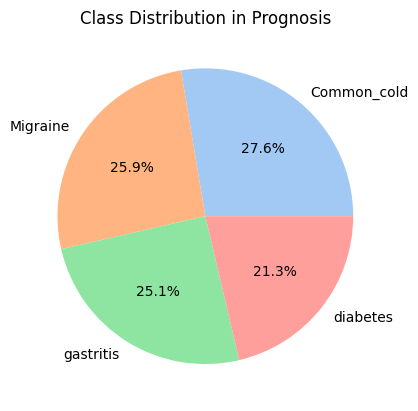

In [ ]:
# Pie chart for class distribution
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Class Distribution in Prognosis')
plt.ylabel('')
plt.show()

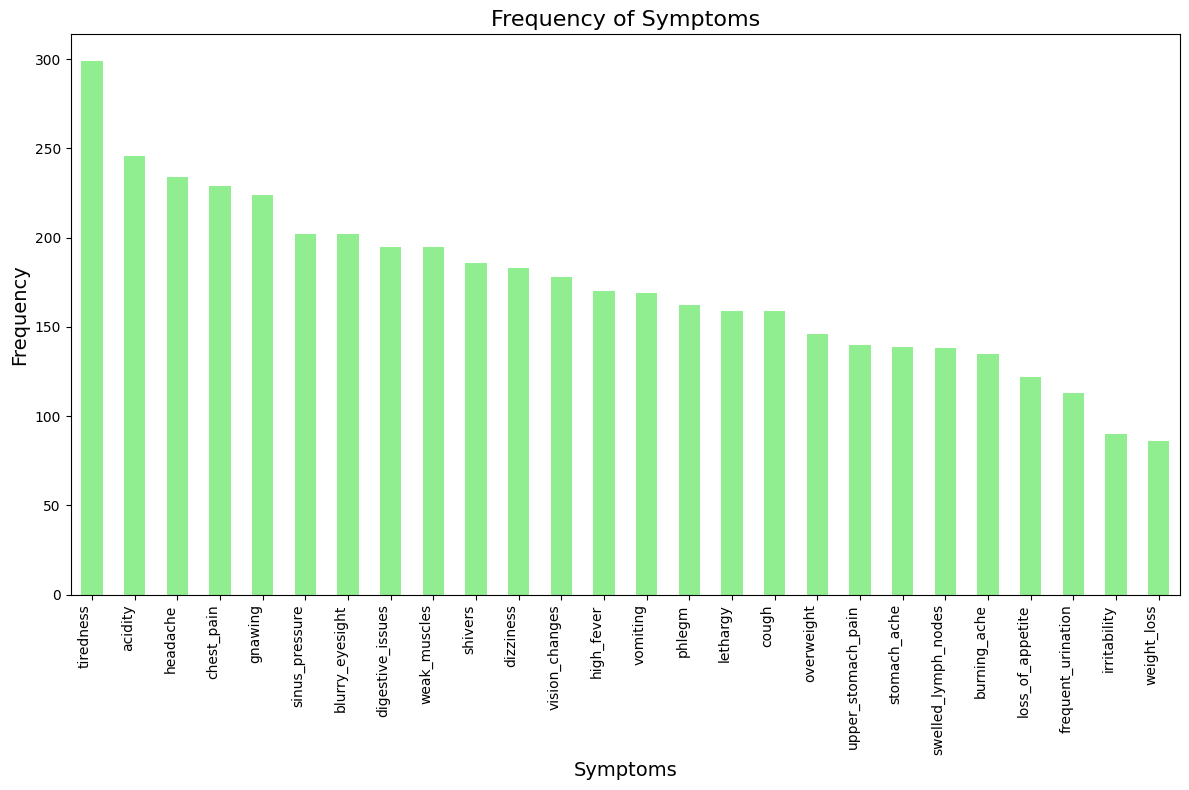

In [ ]:
# Frequency of Symptoms
symptom_columns = [col for col in data.columns if col != 'prognosis']
symptom_sums = data[symptom_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
symptom_sums.plot(kind='bar', color='lightgreen')
plt.title('Frequency of Symptoms', fontsize=16)
plt.xlabel('Symptoms', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align text for better visibility
plt.tight_layout()  # Automatically adjust layout to prevent overlap
plt.show()

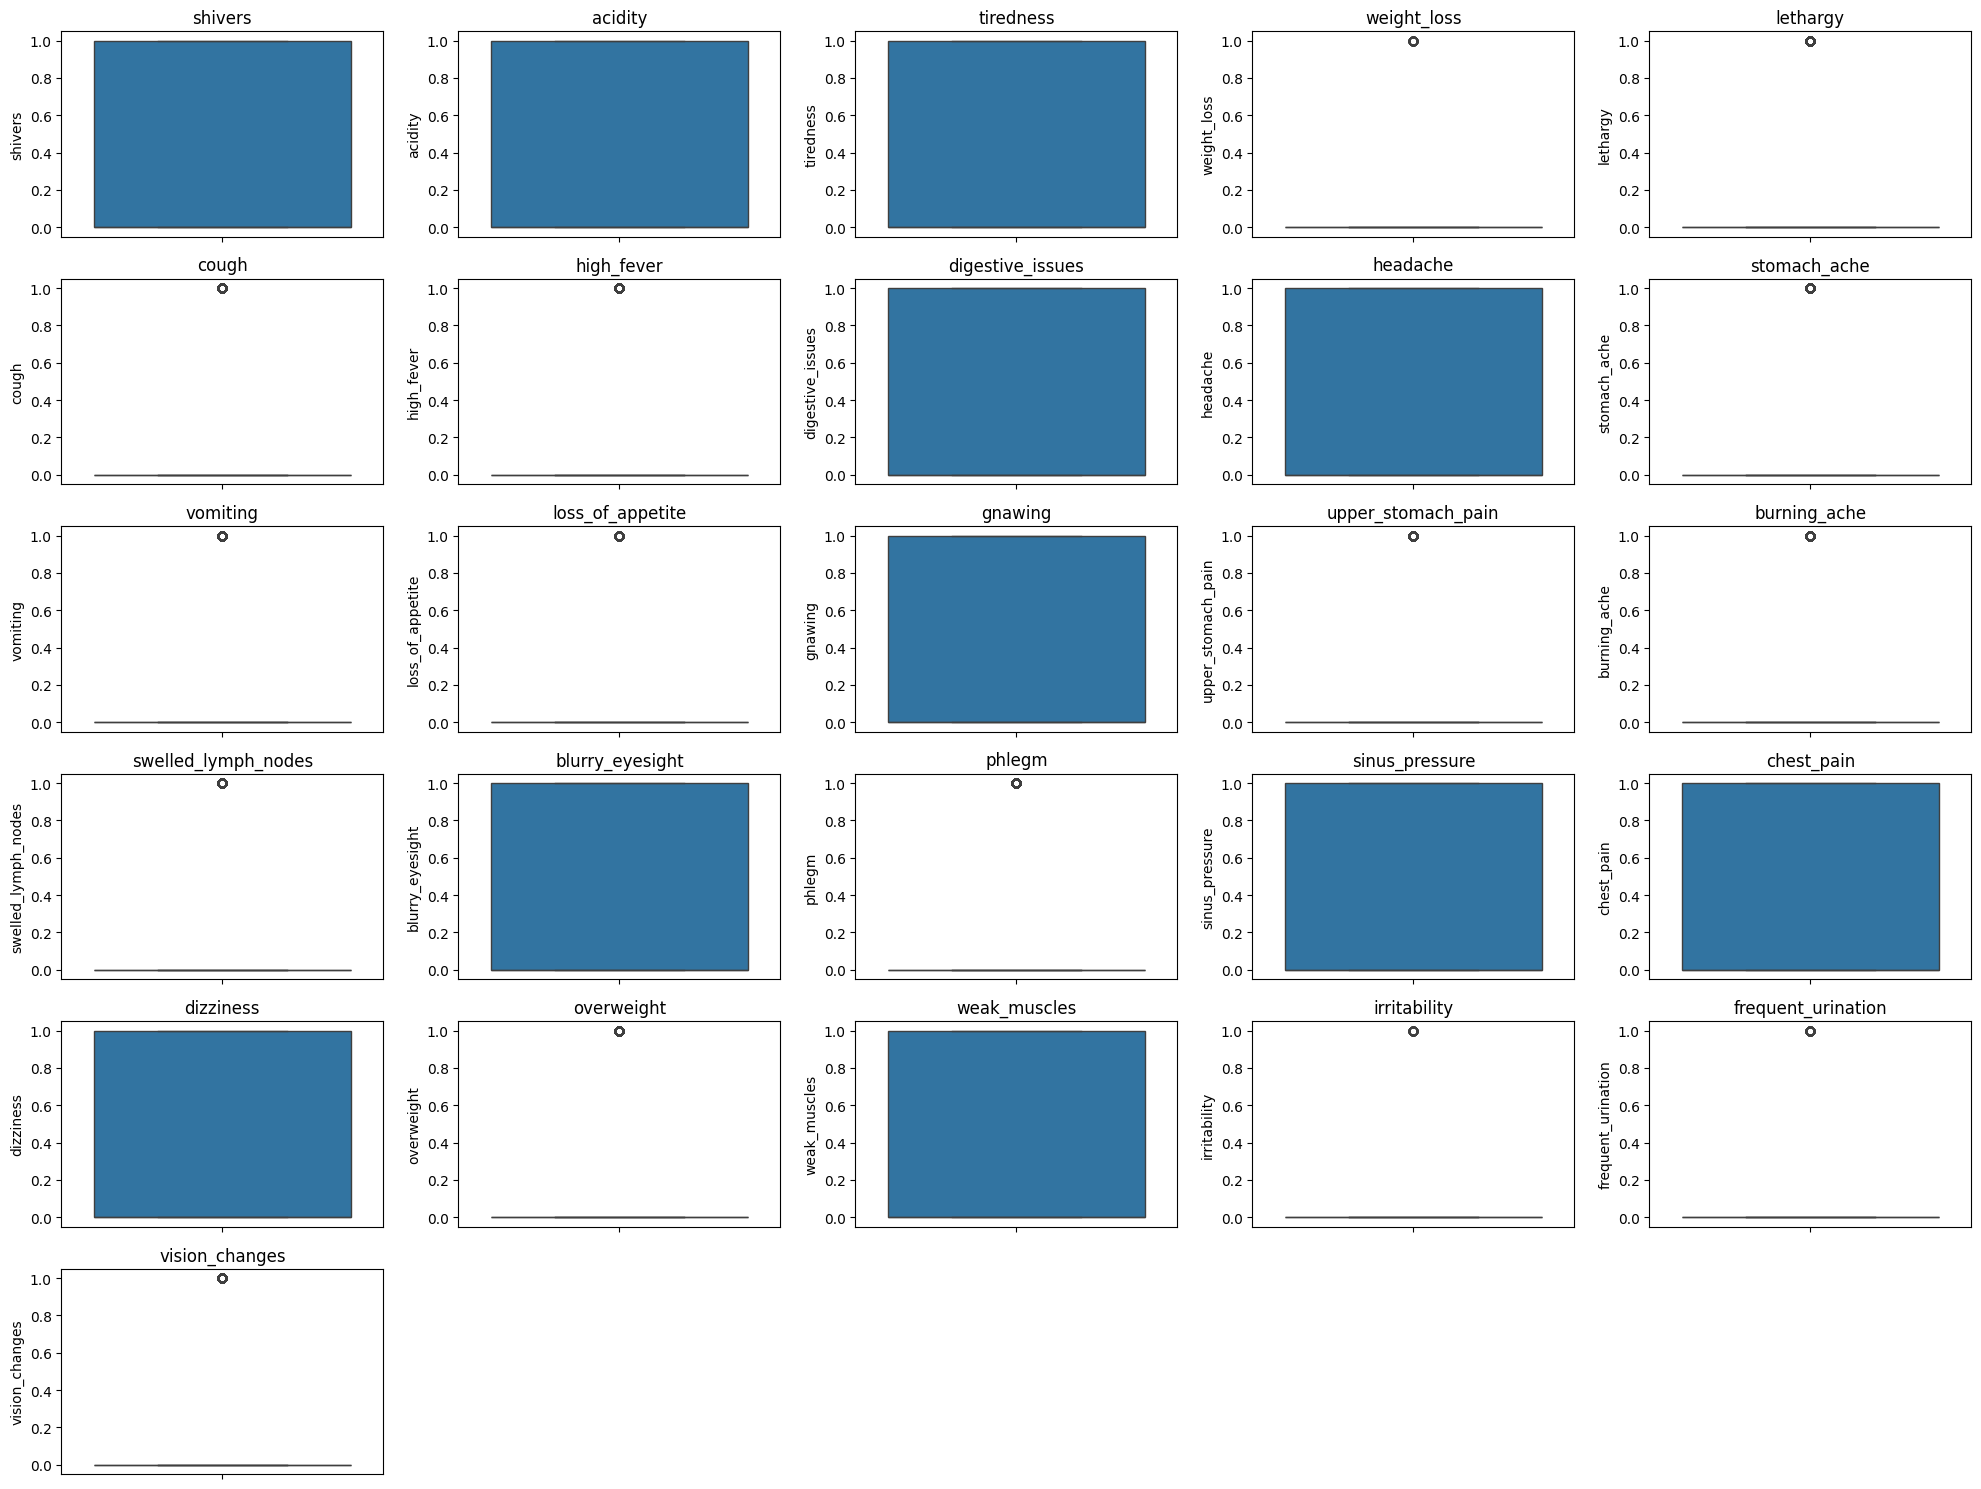

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize boxplots for all binary features
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns[:-1]):  # Exclude the target variable
    plt.subplot(6, 5, i + 1)  # Adjust subplot grid based on the number of features
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
#check data types of the dataset
data.dtypes


,0
shivers,int64
acidity,int64
tiredness,int64
weight_loss,int64
lethargy,int64
cough,int64
high_fever,int64
digestive_issues,int64
headache,int64
stomach_ache,int64


In [ ]:
# Check for non-binary values in binary columns
binary_columns = [col for col in data.columns if set(data[col].unique()).issubset({0, 1})]
for col in binary_columns:
    unique_values = data[col].unique()
    if not set(unique_values).issubset({0, 1}):
        print(f"Unexpected values in {col}: {unique_values}")

Encoding using Label Encoder

In [ ]:
# Encoding the target separately
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = data.drop('prognosis', axis=1)  # Features
y = data['prognosis']              # Target

# Encode the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
#print only the classes with their label
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'Common_cold': np.int64(0), 'Migraine': np.int64(1), 'diabetes': np.int64(2), 'gastritis': np.int64(3)}


In [ ]:
#add y_encoded to the dataset
data['prognosis_encoded'] = y_encoded

#drop prognosis column
data = data.drop('prognosis', axis=1)

In [ ]:
data.head()

,shivers,acidity,tiredness,weight_loss,lethargy,cough,high_fever,digestive_issues,headache,stomach_ache,...,phlegm,sinus_pressure,chest_pain,dizziness,overweight,weak_muscles,irritability,frequent_urination,vision_changes,prognosis_encoded
0,1,0,0,0,0,1,1,1,1,0,...,0,1,1,0,0,1,1,0,0,1
1,0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,1,0,1,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,1,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add the encoded target back to the dataset temporarily
data_with_target = data.copy()
data_with_target['prognosis_encoded'] = y_encoded

# Compute correlation matrix
correlation_matrix = data_with_target.corr()

# Extract correlations of features with the target variable, excluding the target itself
target_correlation = correlation_matrix['prognosis_encoded'].drop('prognosis_encoded').sort_values(ascending=False)

# Print the correlations
print("Correlation of features with the target variable (prognosis_encoded):")
print(target_correlation)

Correlation of features with the target variable (prognosis_encoded):
stomach_ache           0.446895
burning_ache           0.422882
upper_stomach_pain     0.292648
gnawing                0.245476
digestive_issues       0.241090
vomiting               0.239447
acidity                0.194021
weight_loss            0.121750
frequent_urination     0.105706
lethargy               0.089213
blurry_eyesight       -0.001845
tiredness             -0.005627
dizziness             -0.015019
chest_pain            -0.017193
loss_of_appetite      -0.031204
weak_muscles          -0.032008
overweight            -0.058178
vision_changes        -0.071425
irritability          -0.146284
shivers               -0.295857
headache              -0.313523
high_fever            -0.319233
sinus_pressure        -0.323849
cough                 -0.356843
phlegm                -0.440514
swelled_lymph_nodes   -0.506012
Name: prognosis_encoded, dtype: float64


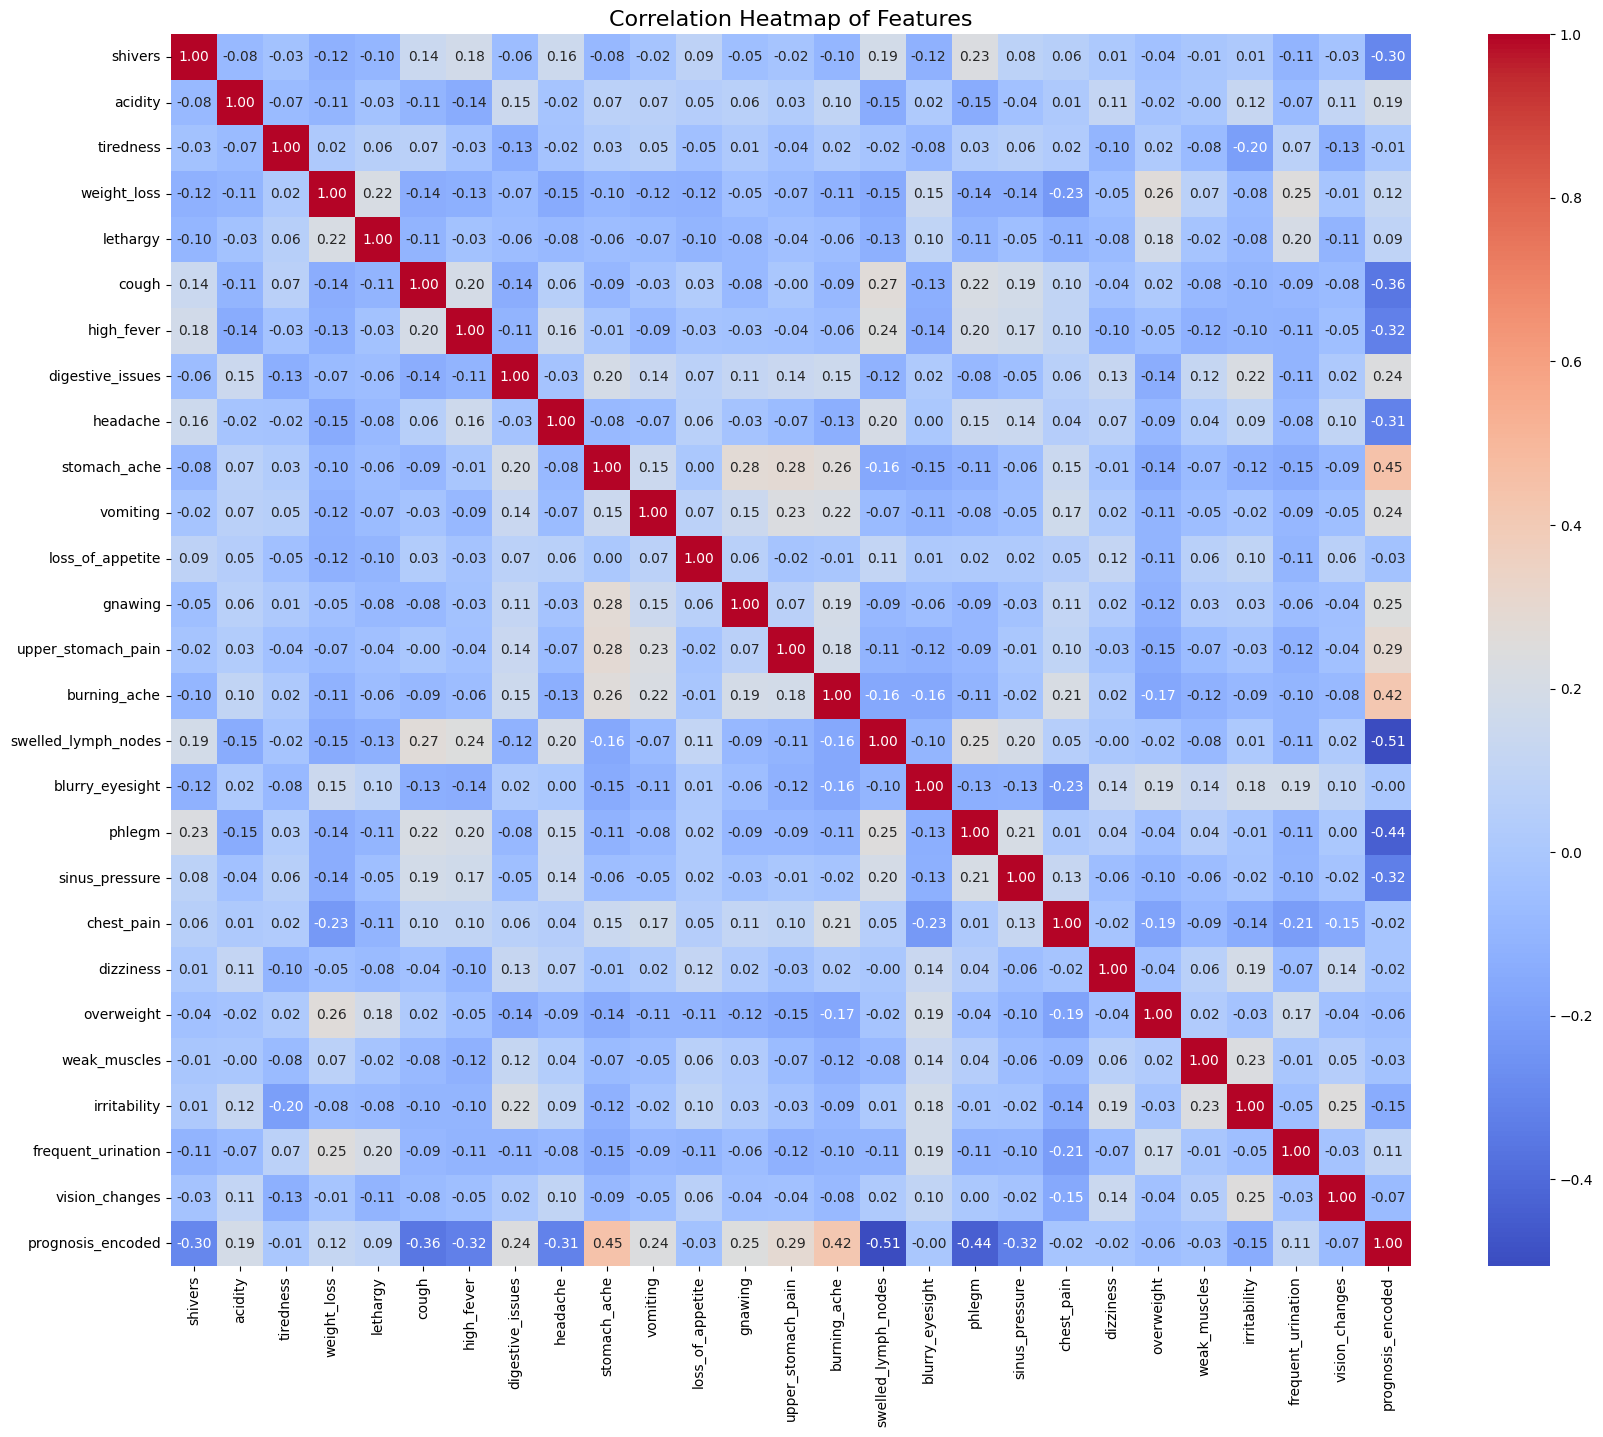

In [ ]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

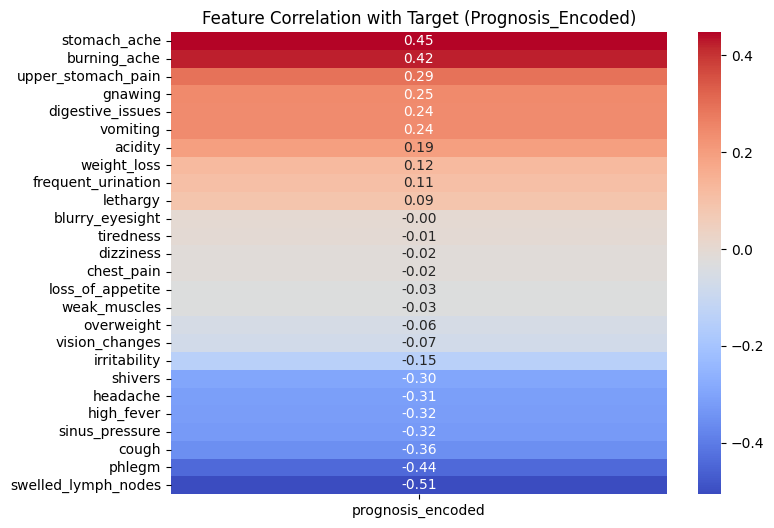

In [ ]:
#Plot a focused heatmap with correlations between features and the target variable only
plt.figure(figsize=(8, 6))
sns.heatmap(target_correlation.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Feature Correlation with Target (Prognosis_Encoded)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split raw data (before PCA!)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Verify the shapes of the splits
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (499, 26), (499,)
Validation set: (107, 26), (107,)
Testing set: (107, 26), (107,)


In [ ]:
#scaling the training set
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
#saving the scaler
joblib.dump(scaler, 'scaler_before_tuning.pkl')

['scaler_before_tuning.pkl']

In [ ]:
#applying the same scaler for testing and validation
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Model Training (Preprocessed Dataset)


Evaluating Logistic Regression...

Logistic Regression Results:
Training Accuracy: 0.9439, F1-score: 0.9437
Validation Accuracy: 0.9065, F1-score: 0.9077
Test Accuracy: 0.8785, F1-score: 0.8757

Evaluating SVM...

SVM Results:
Training Accuracy: 0.9739, F1-score: 0.9738
Validation Accuracy: 0.9159, F1-score: 0.9151
Test Accuracy: 0.8879, F1-score: 0.8865

Evaluating KNN...

KNN Results:
Training Accuracy: 0.9038, F1-score: 0.9022
Validation Accuracy: 0.8785, F1-score: 0.8768
Test Accuracy: 0.8785, F1-score: 0.8773

Evaluating Decision Tree...

Decision Tree Results:
Training Accuracy: 0.7575, F1-score: 0.7573
Validation Accuracy: 0.6262, F1-score: 0.6163
Test Accuracy: 0.7103, F1-score: 0.7055

Evaluating Random Forest...

Random Forest Results:
Training Accuracy: 1.0000, F1-score: 1.0000
Validation Accuracy: 0.8972, F1-score: 0.8949
Test Accuracy: 0.8972, F1-score: 0.8964

Evaluating XGBoost...

XGBoost Results:
Training Accuracy: 1.0000, F1-score: 1.0000
Validation Accuracy: 0.9065,

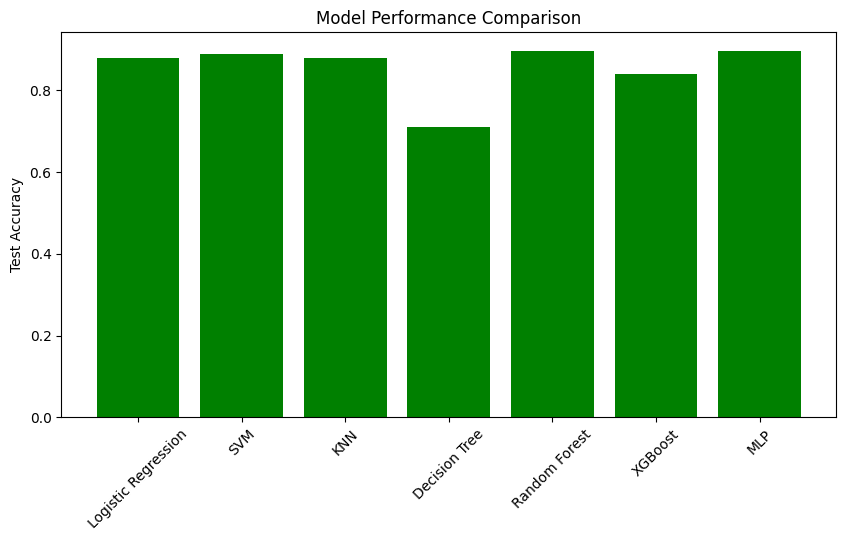

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, log_loss
import matplotlib.pyplot as plt

# ✅ Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    "SVM": SVC(kernel='rbf', random_state=42, probability=True),  # probability=True for predict_proba
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# ✅ Dictionary to store results
results = {}

# ✅ Function to train and evaluate models
def evaluate_model(model, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, model_name):
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Compute accuracy and F1-score
    results[model_name] = {
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Validation Accuracy": accuracy_score(y_val, y_val_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train F1": f1_score(y_train, y_train_pred, average='weighted'),
        "Validation F1": f1_score(y_val, y_val_pred, average='weighted'),
        "Test F1": f1_score(y_test, y_test_pred, average='weighted'),
    }

    print(f"\n{model_name} Results:")
    print(f"Training Accuracy: {results[model_name]['Train Accuracy']:.4f}, F1-score: {results[model_name]['Train F1']:.4f}")
    print(f"Validation Accuracy: {results[model_name]['Validation Accuracy']:.4f}, F1-score: {results[model_name]['Validation F1']:.4f}")
    print(f"Test Accuracy: {results[model_name]['Test Accuracy']:.4f}, F1-score: {results[model_name]['Test F1']:.4f}")

# ✅ Evaluate all models
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_model(model, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, name)

# ✅ Plot accuracies
plt.figure(figsize=(10, 5))
model_names = list(results.keys())
test_accuracies = [results[m]["Test Accuracy"] for m in model_names]

plt.bar(model_names, test_accuracies, color='green')
plt.xticks(rotation=45)
plt.ylabel("Test Accuracy")
plt.title("Model Performance Comparison")
plt.show()

#feature importance graph for random forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# feature selection of random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
feature_importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)



                Feature  Importance
23         irritability    0.100856
16      blurry_eyesight    0.080763
9          stomach_ache    0.060337
3           weight_loss    0.059617
15  swelled_lymph_nodes    0.055906
17               phlegm    0.050116
14         burning_ache    0.045720
24   frequent_urination    0.045040
7      digestive_issues    0.044935
5                 cough    0.039872
25       vision_changes    0.038083
6            high_fever    0.035016
19           chest_pain    0.034449
21           overweight    0.034371
1               acidity    0.032065
18       sinus_pressure    0.029397
20            dizziness    0.026909
8              headache    0.026767
2             tiredness    0.026412
13   upper_stomach_pain    0.026070
10             vomiting    0.021937
12              gnawing    0.020567
22         weak_muscles    0.018864
0               shivers    0.017943
4              lethargy    0.016640
11     loss_of_appetite    0.011348


In [ ]:
selected_features = [
    "irritability", "blurry_eyesight", "stomach_ache", "weight_loss",
    "swelled_lymph_nodes", "phlegm", "burning_ache", "frequent_urination",
    "digestive_issues", "cough", "vision_changes", "high_fever",
    "chest_pain", "overweight", "acidity", "sinus_pressure", "dizziness", "headache", "tiredness", "upper_stomach_pain", "vomiting", "gnawing"
]

# Filter DataFrames using column names (correct way)
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Now train the models
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_model(model, X_train_selected, y_train, X_val_selected, y_val, X_test_selected, y_test, name)


Evaluating Logistic Regression...

Logistic Regression Results:
Training Accuracy: 0.9299, F1-score: 0.9295
Validation Accuracy: 0.8879, F1-score: 0.8882
Test Accuracy: 0.9159, F1-score: 0.9151

Evaluating SVM...

SVM Results:
Training Accuracy: 0.9679, F1-score: 0.9679
Validation Accuracy: 0.8972, F1-score: 0.8976
Test Accuracy: 0.9252, F1-score: 0.9245

Evaluating KNN...

KNN Results:
Training Accuracy: 0.9018, F1-score: 0.9002
Validation Accuracy: 0.8505, F1-score: 0.8471
Test Accuracy: 0.8505, F1-score: 0.8445

Evaluating Decision Tree...

Decision Tree Results:
Training Accuracy: 0.7575, F1-score: 0.7573
Validation Accuracy: 0.6262, F1-score: 0.6163
Test Accuracy: 0.7009, F1-score: 0.6972

Evaluating Random Forest...

Random Forest Results:
Training Accuracy: 0.9980, F1-score: 0.9980
Validation Accuracy: 0.8879, F1-score: 0.8865
Test Accuracy: 0.8879, F1-score: 0.8868

Evaluating XGBoost...

XGBoost Results:
Training Accuracy: 0.9980, F1-score: 0.9980
Validation Accuracy: 0.8879,

# PCA to the Training set

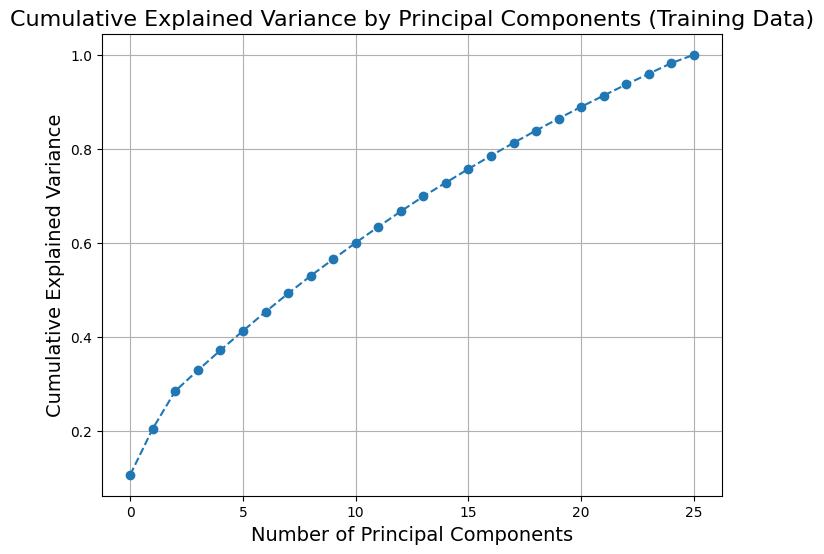

Number of components to retain 90% variance: 22
Shape of dataset after PCA: (499, 22)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('Cumulative Explained Variance by Principal Components (Training Data)', fontsize=16)
plt.grid()
plt.show()

# Choose number of components to retain 90% variance
n_components = next(i for i, cum_var in enumerate(cumulative_variance_ratio) if cum_var >= 0.90) + 1
print(f'Number of components to retain 90% variance: {n_components}')

# Reapply PCA with optimal number of components
pca_optimal = PCA(n_components=n_components)
X_pca_optimal = pca_optimal.fit_transform(X_train_scaled)

# Output the shape of the transformed dataset
print(f'Shape of dataset after PCA: {X_pca_optimal.shape}')

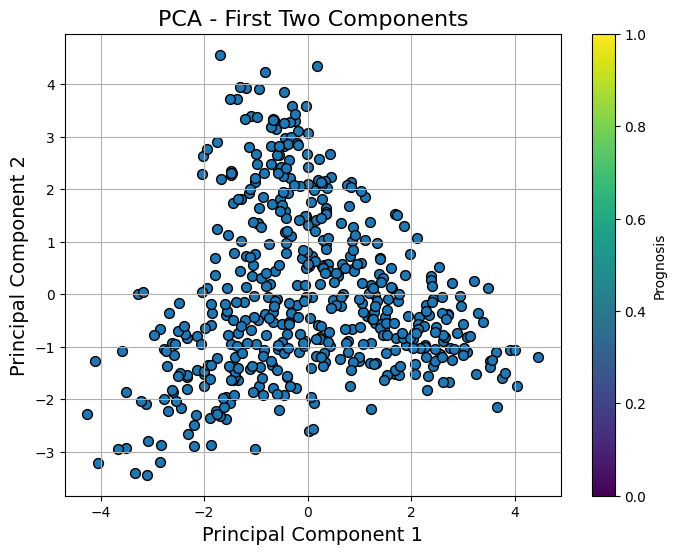

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA - First Two Components', fontsize=16)
plt.colorbar(label='Prognosis')
plt.grid()
plt.show()

In [ ]:
# Get the PCA loading matrix
loading_matrix = pca_optimal.components_

import numpy as np

# Sum the absolute values of loadings for all retained components
feature_importance = np.sum(np.abs(loading_matrix), axis=0)

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#print all the features with their importance
print(feature_importance_df)

                Feature  Importance
18       sinus_pressure    4.051775
4              lethargy    3.857377
1               acidity    3.853711
8              headache    3.845114
14         burning_ache    3.818430
10             vomiting    3.791648
0               shivers    3.741363
22         weak_muscles    3.733235
19           chest_pain    3.671803
24   frequent_urination    3.660520
2             tiredness    3.528901
25       vision_changes    3.512237
11     loss_of_appetite    3.506933
13   upper_stomach_pain    3.458068
5                 cough    3.425524
17               phlegm    3.414807
21           overweight    3.360443
3           weight_loss    3.339760
15  swelled_lymph_nodes    3.288026
7      digestive_issues    3.287520
12              gnawing    3.281544
6            high_fever    3.249620
20            dizziness    3.245104
16      blurry_eyesight    3.187760
9          stomach_ache    3.004940
23         irritability    2.870026


In [ ]:
# Fit PCA on training data
pca_optimal = PCA(n_components=22)
X_train_pca = pca_optimal.fit_transform(X_train_scaled)

# Save the fitted PCA object
joblib.dump(pca_optimal, 'pca_model.pkl')

['pca_model.pkl']

In [ ]:
# Check class distribution
class_distribution = y.value_counts()

# Display class distribution
print(class_distribution)

prognosis
Common_cold    197
Migraine       185
gastritis      179
diabetes       152
Name: count, dtype: int64


In [ ]:
#save the training scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

# Applying same PCA to the testing and validation set

In [ ]:
#use the same training scaler for validation and tsting
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA transformation using the TRAINING PCA
X_val_pca = pca_optimal.transform(X_val_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)

print(f"Training PCA shape: {X_train_pca.shape}")
print(f"Validation PCA shape: {X_val_pca.shape}")
print(f"Test PCA shape: {X_test_pca.shape}")

Training PCA shape: (499, 22)
Validation PCA shape: (107, 22)
Test PCA shape: (107, 22)


In [ ]:
#class distribution of training set
class_distribution_train = pd.Series(y_train).value_counts()
print(class_distribution_train)

0    138
1    130
3    125
2    106
Name: count, dtype: int64


# Training the model using PCA training set


Evaluating Logistic Regression...

Training Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       138
           1       0.93      0.85      0.89       130
           2       0.93      0.94      0.93       106
           3       0.89      0.92      0.91       125

    accuracy                           0.93       499
   macro avg       0.93      0.93      0.92       499
weighted avg       0.93      0.93      0.93       499

Validation Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.92      0.86      0.89        28
           2       0.84      0.91      0.88        23
           3       0.89      0.89      0.89        27

    accuracy                           0.90       107
   macro avg       0.90      0.90      0.90       107
weighted avg       0.90      0.90      0.90       107

Test Repor

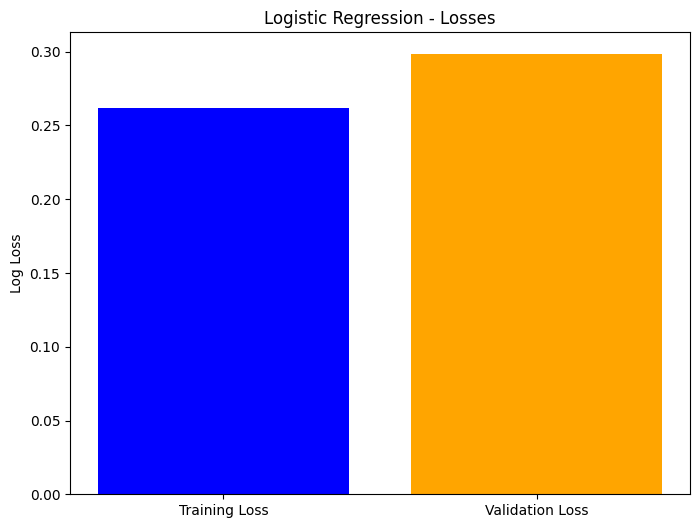


Evaluating SVM...

SVM - Training Loss: 0.0906, Validation Loss: 0.2461


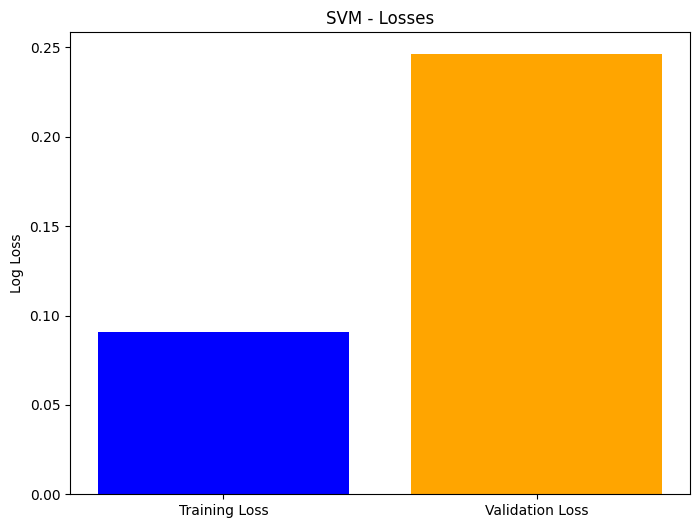


Evaluating KNN...

KNN - Training Loss: 0.2906, Validation Loss: 1.6749


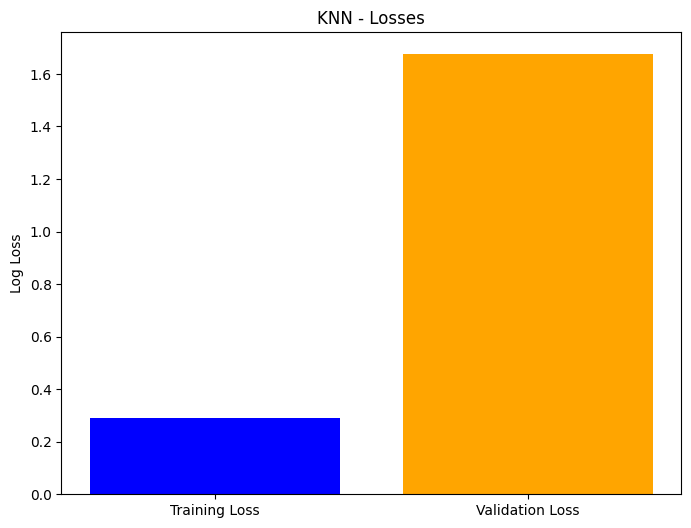


Evaluating Decision Tree...

Decision Tree - Training Loss: 0.5801, Validation Loss: 1.4309


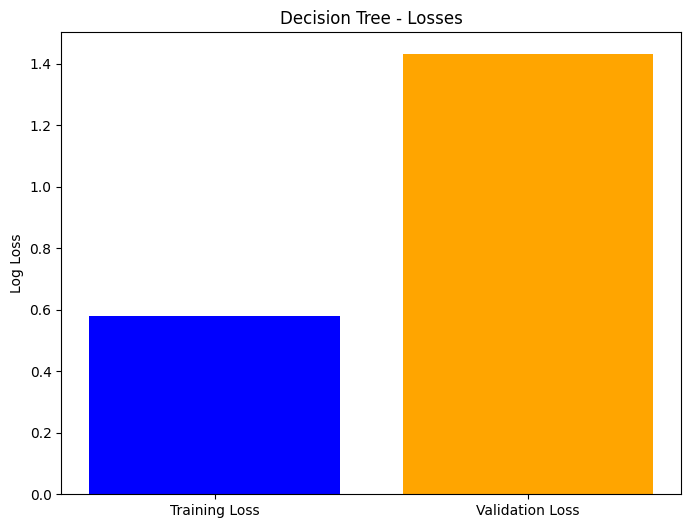


Evaluating Random Forest...

Random Forest - Training Loss: 0.1148, Validation Loss: 0.4200


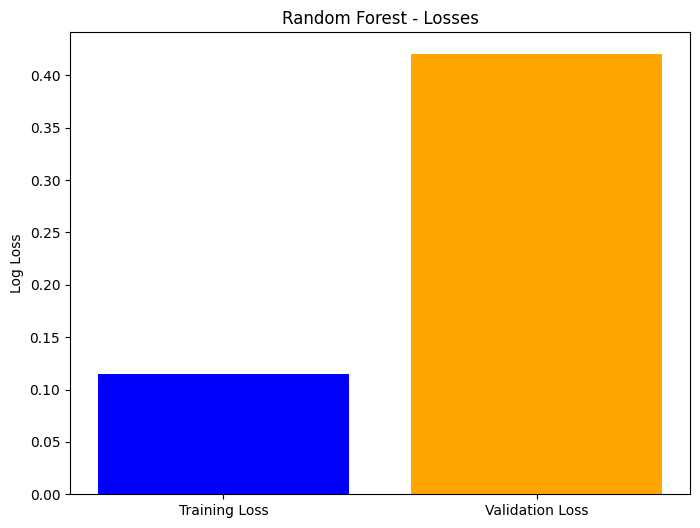


Evaluating XGBoost...

XGBoost - Training Loss: 0.0187, Validation Loss: 0.3117


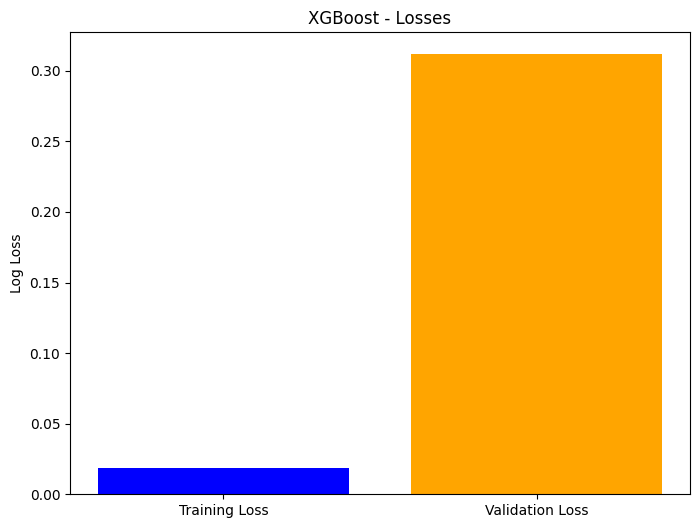


Evaluating MLP...

MLP - Training Loss: 0.0049, Validation Loss: 0.3378


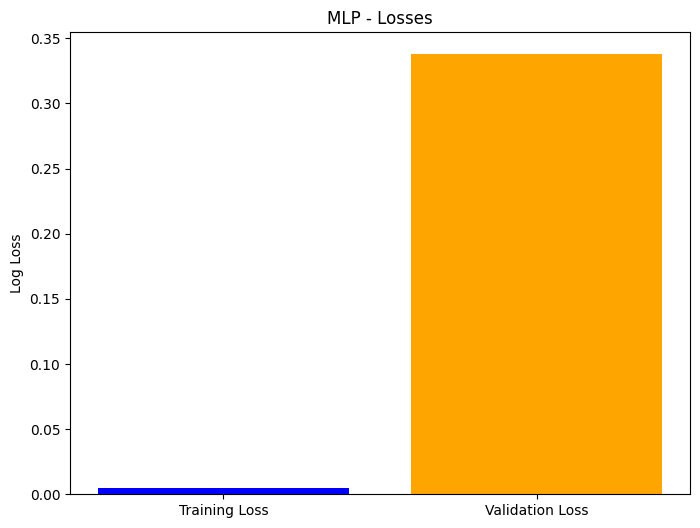

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Store models and their results
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    "SVM": SVC(kernel='rbf', random_state=42, probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

results = {}

# Function to evaluate and plot
def evaluate_model(model, X_train_pca, y_train, X_val_pca, y_val, X_test_pca, y_test):
    model.fit(X_train_pca, y_train)

    # Evaluate on training set
    y_train_pred = model.predict(X_train_pca)
    train_report = classification_report(y_train, y_train_pred)

    # Evaluate on validation set
    y_val_pred = model.predict(X_val_pca)
    val_report = classification_report(y_val, y_val_pred)

    # Evaluate on test set
    y_test_pred = model.predict(X_test_pca)
    test_report = classification_report(y_test, y_test_pred)

    # Store results
    results[model.__class__.__name__] = {
        "Training Report": train_report,
        "Validation Report": val_report,
        "Test Report": test_report
    }

    print(f"\nTraining Report for {model.__class__.__name__}:\n", train_report)
    print(f"Validation Report for {model.__class__.__name__}:\n", val_report)
    print(f"Test Report for {model.__class__.__name__}:\n", test_report)


# Apply models
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_model(model, X_train_pca, y_train, X_val_pca, y_val, X_test_pca, y_test)

import numpy as np
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Function to calculate training and validation losses
def calculate_loss(model, X_train_pca, y_train, X_val_pca, y_val, model_name):
    # Predict probabilities if available, otherwise fallback to predictions
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train_pca)
        y_val_proba = model.predict_proba(X_val_pca)
    elif hasattr(model, "decision_function"):
        y_train_proba = model.decision_function(X_train_pca)
        y_val_proba = model.decision_function(X_val_pca)
    else:
        y_train_proba = model.predict(X_train_pca)
        y_val_proba = model.predict(X_val_pca)

    # Compute losses
    train_loss = log_loss(y_train, y_train_proba)
    val_loss = log_loss(y_val, y_val_proba)

    print(f"\n{model_name} - Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    return train_loss, val_loss

# Initialize losses for plotting
training_losses = {}
validation_losses = {}

# Function to evaluate and plot loss curves for each model
def evaluate_and_plot(model, X_train_pca, y_train, X_val_pca, y_val, model_name):
    model.fit(X_train_pca, y_train)

    # Calculate training and validation losses
    train_loss, val_loss = calculate_loss(model, X_train_pca, y_train, X_val_pca, y_val, model_name)

    # Store losses
    training_losses[model_name] = train_loss
    validation_losses[model_name] = val_loss

    # Plot losses for each model
    plt.figure(figsize=(8, 6))
    plt.bar(['Training Loss', 'Validation Loss'], [train_loss, val_loss], color=['blue', 'orange'])
    plt.title(f'{model_name} - Losses')
    plt.ylabel('Log Loss')
    plt.show()

# List of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    "SVM": SVC(kernel='rbf', random_state=42, probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Loop through models
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_and_plot(model, X_train, y_train, X_val, y_val, name)

In [ ]:
# PCA loadings (correlation between original features and PCs)
loadings = pd.DataFrame(
    pca.components_,
    columns=data.columns[:-1],  # Exclude target column
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Display top contributors for the first few PCs
for i in range(22):  # Show top contributors for the first 5 PCs
    print(f"\nPC{i+1}:")
    print(loadings.iloc[i].abs().sort_values(ascending=False).head())


PC1:
weight_loss           0.333504
blurry_eyesight       0.332612
frequent_urination    0.297925
chest_pain            0.291887
high_fever            0.276521
Name: PC1, dtype: float64

PC2:
stomach_ache          0.373616
burning_ache          0.342449
gnawing               0.295790
upper_stomach_pain    0.289235
digestive_issues      0.276097
Name: PC2, dtype: float64

PC3:
irritability        0.454762
vision_changes      0.353840
dizziness           0.337324
digestive_issues    0.283816
tiredness           0.279959
Name: PC3, dtype: float64

PC4:
weak_muscles          0.490793
gnawing               0.424882
tiredness             0.334075
acidity               0.292739
upper_stomach_pain    0.276194
Name: PC4, dtype: float64

PC5:
acidity             0.440037
tiredness           0.382796
loss_of_appetite    0.318854
high_fever          0.313873
vomiting            0.280311
Name: PC5, dtype: float64

PC6:
loss_of_appetite    0.399416
phlegm              0.380190
tiredness           0

# Tuning SVM Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Type of kernel
    'degree': [3, 4, 5]  # Only for polynomial kernel
}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(SVC(random_state=42, probability=True), param_grid_svm, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search_svm.fit(X_train_selected, y_train)

# Get the best parameters and best model
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")
best_svm_model = grid_search_svm.best_estimator_

# Predictions for Training, Validation, and Testing sets
y_train_pred_svm = best_svm_model.predict(X_train_selected)
y_val_pred_svm = best_svm_model.predict(X_val_selected)


# Classification reports for training, validation, and testing
print(f"\nTraining Classification Report for SVM:\n", classification_report(y_train, y_train_pred_svm))
print(f"\nValidation Classification Report for SVM:\n", classification_report(y_val, y_val_pred_svm))


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters for SVM: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}

Training Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       138
           1       0.98      0.93      0.96       130
           2       0.94      0.97      0.96       106
           3       0.95      0.98      0.96       125

    accuracy                           0.97       499
   macro avg       0.97      0.97      0.97       499
weighted avg       0.97      0.97      0.97       499


Validation Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.96      0.82      0.88        28
           2       0.88      0.91      0.89        23
           3       0.81      0.96      0.88        27

    accuracy                           0.90       107
   macr

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Assuming that PCA and scaling are done before
# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)

# Updated Parameter grid for SVM with smaller C and gamma
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 5, 10, 50],           # Regularization parameter, trying lower values for better generalization
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],  # Kernel coefficient, using smaller gamma values
    'kernel': ['linear', 'rbf', 'poly'],  # Try linear kernel too, for simplicity and potentially less overfitting
    'degree': [2, 3, 4]  # Keep degree for polynomial kernel fixed as it's not always needed
}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(SVC(random_state=42, probability=True), param_grid_svm, cv=10, n_jobs=-1, verbose=2)

# Fit the grid search on scaled data
grid_search_svm.fit(X_train_scaled, y_train)

# Get the best parameters and best model
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")
best_svm_model = grid_search_svm.best_estimator_

# Predictions for Training, Validation, and Testing sets
y_train_pred_svm = best_svm_model.predict(X_train_selected)
y_val_pred_svm = best_svm_model.predict(X_val_selected)

# Classification reports for training, validation, and testing
print(f"\nTraining Classification Report for SVM:\n", classification_report(y_train, y_train_pred_svm))
print(f"\nValidation Classification Report for SVM:\n", classification_report(y_val, y_val_pred_svm))

Fitting 10 folds for each of 315 candidates, totalling 3150 fits
Best Parameters for SVM: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

Training Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       138
           1       0.94      0.85      0.90       130
           2       0.97      0.87      0.92       106
           3       0.90      0.96      0.93       125

    accuracy                           0.92       499
   macro avg       0.93      0.92      0.92       499
weighted avg       0.93      0.92      0.92       499


Validation Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.96      0.82      0.88        28
           2       0.94      0.70      0.80        23
           3       0.74      0.93      0.82        27

    accuracy                           0.86       107
   mac

Fitting 15 folds for each of 80 candidates, totalling 1200 fits
Best Parameters for SVM: {'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Training Loss: 0.1036, Validation Loss: 0.2648, Testing loss: 0.2542

Training Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       138
           1       0.98      0.93      0.96       130
           2       0.94      0.97      0.96       106
           3       0.95      0.98      0.96       125

    accuracy                           0.97       499
   macro avg       0.97      0.97      0.97       499
weighted avg       0.97      0.97      0.97       499


Validation Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.96      0.82      0.88        28
           2       0.88      0.91      0.89        23
           3       0.81      0.96     

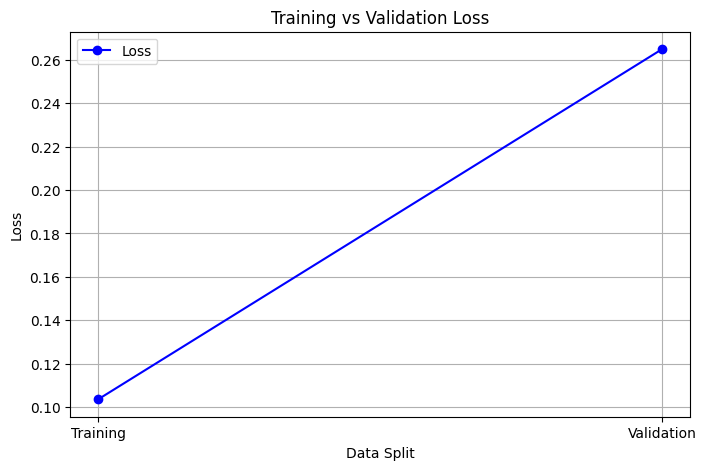

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Updated Parameter grid for SVM with smaller C and gamma
param_grid_svm = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1],           # Regularization parameter, trying lower values for better generalization
    'gamma': [0.00001, 0.0001, 0.001, 'scale'],  # Kernel coefficient, using smaller gamma values
    'kernel': ['linear', 'rbf'],  # Try linear kernel too, for simplicity and potentially less overfitting

    'class_weight': [None, 'balanced']  # Handle potential class imbalance
}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(SVC(random_state=42, probability=True), param_grid_svm, cv=15, n_jobs=-1, verbose=2)

# Fit the grid search on scaled data
grid_search_svm.fit(X_train_selected, y_train)

# Get the best parameters and best model
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")
best_svm_model = grid_search_svm.best_estimator_

# Predictions for Training, Validation, and Testing sets
y_train_pred_svm = best_svm_model.predict(X_train_selected)
y_val_pred_svm = best_svm_model.predict(X_val_selected)
y_test_pred_svm = best_svm_model.predict(X_test_selected)


#training and validation loss
train_loss = log_loss(y_train, best_svm_model.predict_proba(X_train_selected))
val_loss = log_loss(y_val, best_svm_model.predict_proba(X_val_selected))
test_loss = log_loss(y_test, best_svm_model.predict_proba(X_test_selected))
print(f"Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Testing loss: {test_loss:.4f}")

# Classification reports for training, validation, and testing
print(f"\nTraining Classification Report for SVM:\n", classification_report(y_train, y_train_pred_svm))
print(f"\nValidation Classification Report for SVM:\n", classification_report(y_val, y_val_pred_svm))
print(f"\nTest Classification Report for SVM:\n", classification_report(y_test, y_test_pred_svm))

#validation loss vs training loss curves
import matplotlib.pyplot as plt

# Define labels for the x-axis
labels = ['Training', 'Validation']

# Loss values
loss_values = [train_loss, val_loss]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(labels, loss_values, marker='o', linestyle='-', color='b', label="Loss")

# Add labels and title
plt.xlabel("Data Split")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



Use this model as a benchmark

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# Updated Parameter grid for SVM with smaller C and gamma
param_grid_svm = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'gamma': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],  # Only applicable for 'poly' kernel
    'class_weight': [None, 'balanced']
}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(SVC(random_state=42, probability=True), param_grid_svm, cv=15, n_jobs=-1, verbose=2)

# Fit the grid search on scaled data
grid_search_svm.fit(X_train_selected, y_train)

# Get the best parameters and best model
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")
best_svm_model = grid_search_svm.best_estimator_

# Predictions for Training, Validation, and Testing sets
y_train_pred_svm = best_svm_model.predict(X_train_selected)
y_val_pred_svm = best_svm_model.predict(X_val_selected)
y_test_pred_svm = best_svm_model.predict(X_test_selected)

# Classification reports for training, validation, and testing
print(f"\nTraining Classification Report for SVM:\n", classification_report(y_train, y_train_pred_svm))
print(f"\nValidation Classification Report for SVM:\n", classification_report(y_val, y_val_pred_svm))
print(f"\nTest Classification Report for SVM:\n", classification_report(y_test, y_test_pred_svm))

Fitting 15 folds for each of 840 candidates, totalling 12600 fits
Best Parameters for SVM: {'C': 0.1, 'class_weight': 'balanced', 'degree': 2, 'gamma': 1e-07, 'kernel': 'linear'}

Training Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       138
           1       0.95      0.80      0.87       130
           2       0.89      0.96      0.92       106
           3       0.90      0.96      0.93       125

    accuracy                           0.92       499
   macro avg       0.92      0.92      0.92       499
weighted avg       0.92      0.92      0.92       499


Validation Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.96      0.82      0.88        28
           2       0.88      0.96      0.92        23
           3       0.83      0.93      0.88        27

    accuracy                

SVM Training with PCA features

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# Updated Parameter grid for SVM with smaller C and gamma
param_grid_svm = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'gamma': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],  # Only applicable for 'poly' kernel
    'class_weight': [None, 'balanced']
}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(SVC(random_state=42, probability=True), param_grid_svm, cv=15, n_jobs=-1, verbose=2)

# Fit the grid search on scaled data
grid_search_svm.fit(X_train_pca, y_train)

# Get the best parameters and best model
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")
best_svm_model = grid_search_svm.best_estimator_

# Predictions for Training, Validation, and Testing sets
y_train_pred_svm = best_svm_model.predict(X_train_pca)
y_val_pred_svm = best_svm_model.predict(X_val_pca)
y_test_pred_svm = best_svm_model.predict(X_test_pca)

# Classification reports for training, validation, and testing
print(f"\nTraining Classification Report for SVM:\n", classification_report(y_train, y_train_pred_svm))
print(f"\nValidation Classification Report for SVM:\n", classification_report(y_val, y_val_pred_svm))
print(f"\nTest Classification Report for SVM:\n", classification_report(y_test, y_test_pred_svm))

Fitting 15 folds for each of 840 candidates, totalling 12600 fits
Best Parameters for SVM: {'C': 0.05, 'class_weight': None, 'degree': 2, 'gamma': 1e-07, 'kernel': 'linear'}

Training Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       138
           1       0.92      0.86      0.89       130
           2       0.93      0.93      0.93       106
           3       0.90      0.92      0.91       125

    accuracy                           0.92       499
   macro avg       0.92      0.92      0.92       499
weighted avg       0.92      0.92      0.92       499


Validation Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.92      0.86      0.89        28
           2       0.88      0.91      0.89        23
           3       0.86      0.89      0.87        27

    accuracy                     

# Tuning KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],   # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search_knn.fit(X_train_pca, y_train)

# Get the best parameters and best model
print(f"Best Parameters for KNN: {grid_search_knn.best_params_}")
best_knn_model = grid_search_knn.best_estimator_

# Predictions for Training, Validation, and Testing sets
y_train_pred_knn = best_knn_model.predict(X_train_pca)
y_val_pred_knn = best_knn_model.predict(X_val_pca)


# Classification reports for training, validation, and testing
print(f"\nTraining Classification Report for KNN:\n", classification_report(y_train, y_train_pred_knn))
print(f"\nValidation Classification Report for KNN:\n", classification_report(y_val, y_val_pred_knn))



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}

Training Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       138
           1       0.96      0.75      0.84       130
           2       0.89      0.95      0.92       106
           3       0.86      0.92      0.89       125

    accuracy                           0.89       499
   macro avg       0.90      0.89      0.89       499
weighted avg       0.90      0.89      0.89       499


Validation Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.90      0.68      0.78        28
           2       0.81      0.96      0.88        23
           3       0.89      0.89      0.89        27

    accuracy                           0.86       107
 

# Tuning Random Forest Using GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 8],
    'class_weight': ['balanced_subsample', 'balanced', None],
    'max_features': ['sqrt', 'log2']
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,

    scoring='accuracy',  # Metric to optimize
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Print detailed logs
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_pca, y_train)

# Print the best parameters and validation accuracy
print("Best Parameters:", grid_search.best_params_)
print("Validation Accuracy:", grid_search.best_score_)

# Get the best model
best_rf = grid_search.best_estimator_

# Predictions
y_train_pred = best_rf.predict(X_train_pca)
y_val_pred = best_rf.predict(X_val_pca)

# Compute log loss (using predicted probabilities)
train_loss = log_loss(y_train, best_rf.predict_proba(X_train_pca))
val_loss = log_loss(y_val, best_rf.predict_proba(X_val_pca))

# Print classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Print log loss
print("\nTraining Log Loss:", train_loss)
print("Validation Log Loss:", val_loss)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 50}
Validation Accuracy: 0.88389898989899

Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       138
           1       0.96      0.83      0.89       130
           2       0.95      0.93      0.94       106
           3       0.89      0.94      0.92       125

    accuracy                           0.92       499
   macro avg       0.92      0.92      0.92       499
weighted avg       0.92      0.92      0.92       499


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.95      0.68      0.79        28
           2       0.76      0.83      0.79        23
           3       0.83 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [4, 6, 8, 10],
    'class_weight': ['balanced_subsample', 'balanced', None],
    'max_features': ['sqrt', 'log2', 0.5]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42, bootstrap=True)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Print detailed logs
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_pca, y_train)

# Print the best parameters and validation accuracy
print("Best Parameters:", grid_search.best_params_)
print("Validation Accuracy:", grid_search.best_score_)

# Get the best model
best_rf = grid_search.best_estimator_

# Predictions
y_train_pred = best_rf.predict(X_train_pca)
y_val_pred = best_rf.predict(X_val_pca)

# Compute log loss (using predicted probabilities)
train_loss = log_loss(y_train, best_rf.predict_proba(X_train_pca))
val_loss = log_loss(y_val, best_rf.predict_proba(X_val_pca))

# Print classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Print log loss
print("\nTraining Log Loss:", train_loss)
print("Validation Log Loss:", val_loss)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Validation Accuracy: 0.87589898989899

Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       138
           1       0.98      0.94      0.96       130
           2       0.98      0.96      0.97       106
           3       0.93      0.97      0.95       125

    accuracy                           0.96       499
   macro avg       0.96      0.96      0.96       499
weighted avg       0.96      0.96      0.96       499


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.95      0.68      0.79        28
           2       0.81      0.91      0.86        23
           3 

Check if the Random Forest Model is working well with selected features.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss

# Define the simplified parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 7],
    'min_samples_split': [20, 30],
    'min_samples_leaf': [10, 15],
    'class_weight': ['balanced_subsample', 'balanced', None],
    'max_features': ['sqrt', 'log2']
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42, max_samples=1.0, max_features=0.4)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=10,  # 10-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_selected, y_train)

# Print the best parameters and validation accuracy
print("Best Parameters:", grid_search.best_params_)
print("Validation Accuracy:", grid_search.best_score_)

# Get the best model
best_rf = grid_search.best_estimator_

# Predictions
y_train_pred = best_rf.predict(X_train_selected)
y_val_pred = best_rf.predict(X_val_selected)

# Compute log loss (using predicted probabilities)
train_loss = log_loss(y_train, best_rf.predict_proba(X_train_selected))
val_loss = log_loss(y_val, best_rf.predict_proba(X_val_selected))


# Print classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))


# Print log loss
print("\nTraining Log Loss:", train_loss)
print("Validation Log Loss:", val_loss)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 100}
Validation Accuracy: 0.8759183673469388

Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       138
           1       0.98      0.75      0.85       130
           2       0.84      0.95      0.89       106
           3       0.86      0.97      0.91       125

    accuracy                           0.90       499
   macro avg       0.90      0.90      0.90       499
weighted avg       0.91      0.90      0.90       499


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.95      0.64      0.77        28
           2       0.76      0.96      0.85        23
           

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Best Parameters: {'ccp_alpha': 0.001, 'class_weight': 'balanced_subsample', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 100}
Validation Accuracy: 0.8659591836734695

Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       138
           1       0.92      0.79      0.85       130
           2       0.94      0.94      0.94       106
           3       0.86      0.94      0.90       125

    accuracy                           0.90       499
   macro avg       0.91      0.91      0.90       499
weighted avg       0.91      0.90      0.90       499


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.95      0.68      0.79        28
           2       0.84      0.91      0.88

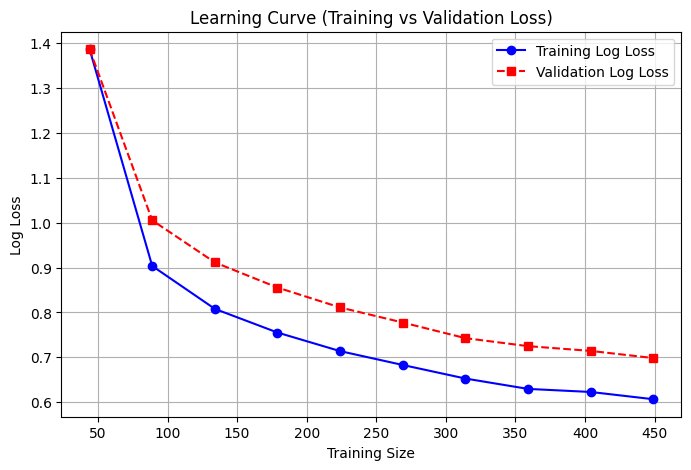

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss

# Define the simplified parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 7],
    'min_samples_split': [20, 30],
    'min_samples_leaf': [10, 15],
    'class_weight': ['balanced_subsample', 'balanced', None],
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.001, 0.01, 0.1]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42, bootstrap=True, max_samples=0.7, max_features=0.4)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=10,  # 10-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_pca, y_train)

# Print the best parameters and validation accuracy
print("Best Parameters:", grid_search.best_params_)
print("Validation Accuracy:", grid_search.best_score_)

# Get the best model
best_rf = grid_search.best_estimator_

# Predictions
y_train_pred = best_rf.predict(X_train_pca)
y_val_pred = best_rf.predict(X_val_pca)
y_test_pred = best_rf.predict(X_test_pca)

# Compute log loss (using predicted probabilities)
train_loss = log_loss(y_train, best_rf.predict_proba(X_train_pca))
val_loss = log_loss(y_val, best_rf.predict_proba(X_val_pca))


# Print classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print log loss
print("\nTraining Log Loss:", train_loss)
print("Validation Log Loss:", val_loss)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the scoring function
scoring = 'neg_log_loss'  # Negative log loss (since GridSearchCV maximizes scores)

# Compute learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_rf, X_train_pca, y_train, cv=10, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Convert scores back to log loss (since it's negative in sklearn)
train_loss_mean = -np.mean(train_scores, axis=1)
val_loss_mean = -np.mean(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_loss_mean, marker='o', linestyle='-', color='b', label='Training Log Loss')
plt.plot(train_sizes, val_loss_mean, marker='s', linestyle='--', color='r', label='Validation Log Loss')

# Labels and title
plt.xlabel("Training Size")
plt.ylabel("Log Loss")
plt.title("Learning Curve (Training vs Validation Loss)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss

# Define the simplified parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 7],
    'min_samples_split': [20, 30],
    'min_samples_leaf': [10, 15],
    'class_weight': ['balanced_subsample', 'balanced', None],
    'max_features': ['sqrt', 'log2']
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42, max_samples=1.0, max_features=0.4)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=10,  # 10-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_pca, y_train)

# Print the best parameters and validation accuracy
print("Best Parameters:", grid_search.best_params_)
print("Validation Accuracy:", grid_search.best_score_)

# Get the best model
best_rf = grid_search.best_estimator_

# Predictions
y_train_pred = best_rf.predict(X_train_pca)
y_val_pred = best_rf.predict(X_val_pca)
y_test_pred = best_rf.predict(X_test_pca)

# Compute log loss (using predicted probabilities)
train_loss = log_loss(y_train, best_rf.predict_proba(X_train_pca))
val_loss = log_loss(y_val, best_rf.predict_proba(X_val_pca))


# Print classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print log loss
print("\nTraining Log Loss:", train_loss)
print("Validation Log Loss:", val_loss)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 50}
Validation Accuracy: 0.8719591836734694

Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       138
           1       0.92      0.82      0.87       130
           2       0.94      0.95      0.94       106
           3       0.88      0.94      0.91       125

    accuracy                           0.91       499
   macro avg       0.91      0.91      0.91       499
weighted avg       0.91      0.91      0.91       499


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.95      0.68      0.79        28
           2       0.77      0.87      0.82        23
           3

Use this Model as a benchmark

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss
from scipy.stats import randint

# Define the parameter distributions for randomized search
param_dist = {
    'n_estimators': randint(50, 150),         # Range between 50 and 150
    'max_depth': [5, 7],
    'min_samples_split': randint(15, 35),     # 20–30 range
    'min_samples_leaf': randint(8, 20),       # 10–15 range
    'class_weight': ['balanced_subsample', 'balanced', None],
    'max_features': ['sqrt', 'log2']
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42, max_samples=1.0, max_features=0.4)

# Repeated Stratified K-Fold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Try 50 random combinations
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit to training data
random_search.fit(X_train_pca, y_train)

# Best model and score
print("Best Parameters:", random_search.best_params_)
print("Validation Accuracy:", random_search.best_score_)

# Get the best estimator
best_rf = random_search.best_estimator_

# Predictions
y_train_pred = best_rf.predict(X_train_pca)
y_val_pred = best_rf.predict(X_val_pca)
y_test_pred = best_rf.predict(X_test_pca)

# Log loss
train_loss = log_loss(y_train, best_rf.predict_proba(X_train_pca))
val_loss = log_loss(y_val, best_rf.predict_proba(X_val_pca))

# Classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

print("\nTraining Log Loss:", train_loss)
print("Validation Log Loss:", val_loss)

Fitting 30 folds for each of 50 candidates, totalling 1500 fits
Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 25, 'n_estimators': 124}
Validation Accuracy: 0.8737278911564627

Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       138
           1       0.92      0.82      0.87       130
           2       0.93      0.94      0.94       106
           3       0.89      0.94      0.91       125

    accuracy                           0.91       499
   macro avg       0.91      0.91      0.91       499
weighted avg       0.91      0.91      0.91       499


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.95      0.68      0.79        28
           2       0.84      0.91      0.88        23
          

# Tuning Random Forest Using Optuna

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.3 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, log_loss

# Define the objective function
def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 100),  # Range: 50 to 100
        'max_depth': trial.suggest_int('max_depth', 3, 7),  # Range: 3 to 7
        'min_samples_split': trial.suggest_int('min_samples_split', 10, 20),  # Range: 10 to 20
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 10),  # Range: 5 to 10
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None]),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.5]),
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0.01, 0.5, log=True)  # Range: 0.01 to 0.5 (log scale)
    }

    # Create the model
    model = RandomForestClassifier(random_state=42, **params)

    # Perform cross-validation and compute log loss
    log_loss_score = -cross_val_score(model, X_train_pca, y_train, cv=10, scoring='neg_log_loss').mean()

    # Store the model and parameters in the trial object
    trial.set_user_attr('model', model)
    trial.set_user_attr('params', params)

    return log_loss_score  # Minimize log loss

# Create an Optuna study
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=50)

# Print the best parameters
print("Best parameters:", study.best_params)

# Retrieve the best model
best_model = study.best_trial.user_attrs['model']

# Fit the best model on the full training data
best_model.fit(X_train_pca, y_train)

# Predictions
y_train_pred = best_model.predict(X_train_pca)
y_val_pred = best_model.predict(X_val_pca)
y_test_pred = best_model.predict(X_test_pca)

# Classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Compute log loss (using predicted probabilities)
train_loss = log_loss(y_train, best_model.predict_proba(X_train_pca))
val_loss = log_loss(y_val, best_model.predict_proba(X_val_pca))
test_loss = log_loss(y_test, best_model.predict_proba(X_test_pca))

# Print log loss
print("\nTraining Log Loss:", train_loss)
print("Validation Log Loss:", val_loss)
print("Test Log Loss:", test_loss)

[I 2025-03-15 11:45:35,453] A new study created in memory with name: no-name-ccd549a4-7681-4b5d-8543-609c1f72167f
[I 2025-03-15 11:45:38,592] Trial 0 finished with value: 0.8375927180059474 and parameters: {'n_estimators': 81, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 9, 'class_weight': 'balanced', 'max_features': 'log2', 'ccp_alpha': 0.015584351453444532}. Best is trial 0 with value: 0.8375927180059474.
[I 2025-03-15 11:45:40,859] Trial 1 finished with value: 1.3871074834654586 and parameters: {'n_estimators': 57, 'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 8, 'class_weight': 'balanced', 'max_features': 'sqrt', 'ccp_alpha': 0.3251616192547717}. Best is trial 0 with value: 0.8375927180059474.
[I 2025-03-15 11:45:42,876] Trial 2 finished with value: 0.6658636165153266 and parameters: {'n_estimators': 77, 'max_depth': 5, 'min_samples_split': 16, 'min_samples_leaf': 6, 'class_weight': 'balanced', 'max_features': 'log2', 'ccp_alpha': 0.012520049938422881

Best parameters: {'n_estimators': 88, 'max_depth': 7, 'min_samples_split': 17, 'min_samples_leaf': 7, 'class_weight': None, 'max_features': 0.5, 'ccp_alpha': 0.010015579735754085}

Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       138
           1       0.91      0.79      0.85       130
           2       0.92      0.95      0.94       106
           3       0.88      0.93      0.90       125

    accuracy                           0.90       499
   macro avg       0.90      0.90      0.90       499
weighted avg       0.90      0.90      0.90       499


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.95      0.68      0.79        28
           2       0.81      0.91      0.86        23
           3       0.83      0.93      0.88        27

    accuracy                           0.87  

[I 2025-04-06 06:20:58,199] A new study created in memory with name: no-name-e0825364-8250-4392-aa14-ac43b1959e6f
[I 2025-04-06 06:21:02,157] Trial 0 finished with value: 0.42357807752515714 and parameters: {'n_estimators': 180, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 5, 'class_weight': 'balanced', 'max_features': 0.7, 'ccp_alpha': 0.01859864210149929}. Best is trial 0 with value: 0.42357807752515714.
[I 2025-04-06 06:21:04,818] Trial 1 finished with value: 0.6396362501500089 and parameters: {'n_estimators': 194, 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 8, 'class_weight': 'balanced', 'max_features': 'log2', 'ccp_alpha': 0.012825025144954545}. Best is trial 0 with value: 0.42357807752515714.
[I 2025-04-06 06:21:09,456] Trial 2 finished with value: 0.4468102710215979 and parameters: {'n_estimators': 175, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 8, 'class_weight': 'balanced', 'max_features': 0.9, 'ccp_alpha': 0.03173780328755923

Best parameters: {'n_estimators': 150, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'class_weight': None, 'max_features': 0.7, 'ccp_alpha': 0.005963916845095547}

Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       138
           1       0.95      0.88      0.92       130
           2       0.93      0.95      0.94       106
           3       0.91      0.94      0.92       125

    accuracy                           0.94       499
   macro avg       0.94      0.94      0.94       499
weighted avg       0.94      0.94      0.94       499


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.95      0.68      0.79        28
           2       0.84      0.91      0.88        23
           3       0.81      0.93      0.86        27

    accuracy                           0.87 

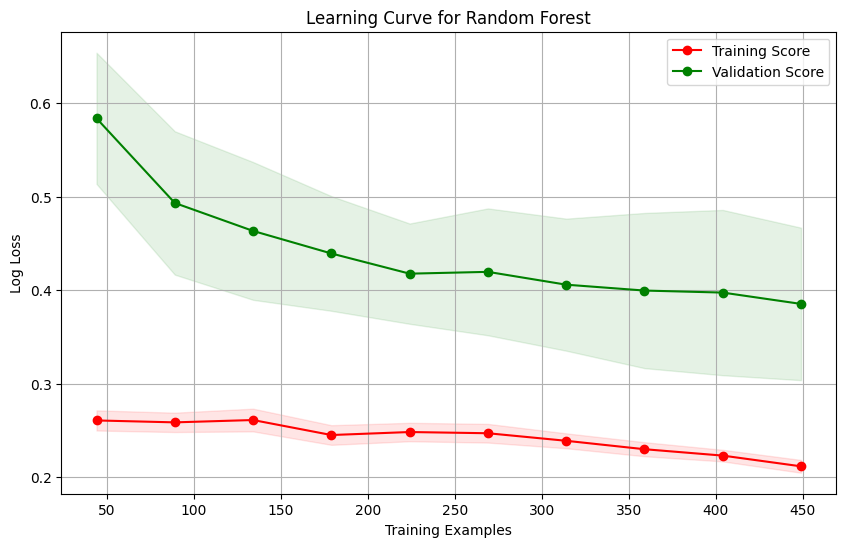

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, log_loss

# Define the objective function
def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 150, 200),  # Range: 50 to 100
        'max_depth': trial.suggest_int('max_depth', 6, 10),  # Range: 3 to 7
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 15),  # Range: 10 to 20
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 4, 8),  # Range: 5 to 10
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None]),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.7, 0.9]),
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0.005, 0.05, log=True)  # Range: 0.01 to 0.5 (log scale)
    }

    # Create the model
    model = RandomForestClassifier(random_state=42, **params)

    # Stratified K-Fold Cross-Validation to ensure balanced class distribution
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation and compute log loss
    log_loss_score = -cross_val_score(model, X_train_pca, y_train, cv=stratified_kfold, scoring='neg_log_loss').mean()

    # Store the model and parameters in the trial object
    trial.set_user_attr('model', model)
    trial.set_user_attr('params', params)

    return log_loss_score  # Minimize log loss

# Create an Optuna study
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=50)

# Print the best parameters
print("Best parameters:", study.best_params)

# Retrieve the best model
best_model = study.best_trial.user_attrs['model']

# Fit the best model on the full training data
best_model.fit(X_train_pca, y_train)

# Predictions
y_train_pred = best_model.predict(X_train_pca)
y_val_pred = best_model.predict(X_val_pca)

# Classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Compute log loss (using predicted probabilities)
train_loss = log_loss(y_train, best_model.predict_proba(X_train_pca))
val_loss = log_loss(y_val, best_model.predict_proba(X_val_pca))

# Print log loss
print("\nTraining Log Loss:", train_loss)
print("Validation Log Loss:", val_loss)
print("Test Log Loss:", test_loss)

# Plot learning curves
def plot_learning_curve(estimator, X, y, cv, title="Learning Curve"):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='neg_log_loss', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Convert scores to positive values (since learning_curve returns negative log loss)
    train_scores = -train_scores
    val_scores = -val_scores

    # Calculate mean and standard deviation
    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    val_scores_mean = val_scores.mean(axis=1)
    val_scores_std = val_scores.std(axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Log Loss")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation Score")

    plt.legend(loc="best")
    plt.show()

# Plot learning curves for the best model
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
plot_learning_curve(best_model, X_train_pca, y_train, cv=stratified_kfold, title="Learning Curve for Random Forest")

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, log_loss

# Define the objective function
def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 100),  # Range: 50 to 100
        'max_depth': trial.suggest_int('max_depth', 4, 6),  # Range: 3 to 7
        'min_samples_split': trial.suggest_int('min_samples_split', 10, 15),  # Range: 10 to 20
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 10),  # Range: 5 to 10
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None]),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.5, 0.6]),
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0.01, 0.1, log=True)  # Range: 0.01 to 0.5 (log scale)
    }

    # Create the model
    model = RandomForestClassifier(random_state=42, **params)

    # Stratified K-Fold Cross-Validation to ensure balanced class distribution
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation and compute log loss
    log_loss_score = -cross_val_score(model, X_train_pca, y_train, cv=stratified_kfold, scoring='neg_log_loss').mean()

    # Store the model and parameters in the trial object
    trial.set_user_attr('model', model)
    trial.set_user_attr('params', params)

    return log_loss_score  # Minimize log loss

# Create an Optuna study
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=40)

# Print the best parameters
print("Best parameters:", study.best_params)

# Retrieve the best model
best_model = study.best_trial.user_attrs['model']

# Fit the best model on the full training data
best_model.fit(X_train_pca, y_train)

# Predictions
y_train_pred = best_model.predict(X_train_pca)
y_val_pred = best_model.predict(X_val_pca)
y_test_pred = best_model.predict(X_test_pca)

# Classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Compute log loss (using predicted probabilities)
train_loss = log_loss(y_train, best_model.predict_proba(X_train_pca))
val_loss = log_loss(y_val, best_model.predict_proba(X_val_pca))
test_loss = log_loss(y_test, best_model.predict_proba(X_test_pca))

# Print log loss
print("\nTraining Log Loss:", train_loss)
print("Validation Log Loss:", val_loss)
print("Test Log Loss:", test_loss)

[I 2025-03-16 00:05:37,808] A new study created in memory with name: no-name-0019edf1-3b52-4a16-a110-2d7e8d5b7182
[I 2025-03-16 00:05:38,842] Trial 0 finished with value: 0.6394788884033884 and parameters: {'n_estimators': 82, 'max_depth': 6, 'min_samples_split': 15, 'min_samples_leaf': 5, 'class_weight': None, 'max_features': 'log2', 'ccp_alpha': 0.01591337147232097}. Best is trial 0 with value: 0.6394788884033884.
[I 2025-03-16 00:05:39,982] Trial 1 finished with value: 0.8124472703219903 and parameters: {'n_estimators': 98, 'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 10, 'class_weight': None, 'max_features': 'log2', 'ccp_alpha': 0.05510175490534254}. Best is trial 0 with value: 0.6394788884033884.
[I 2025-03-16 00:05:40,974] Trial 2 finished with value: 0.6650220744237375 and parameters: {'n_estimators': 83, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 6, 'class_weight': 'balanced', 'max_features': 'log2', 'ccp_alpha': 0.010952578756130423}. Best is 

Best parameters: {'n_estimators': 73, 'max_depth': 6, 'min_samples_split': 11, 'min_samples_leaf': 6, 'class_weight': 'balanced', 'max_features': 0.6, 'ccp_alpha': 0.010341504996260487}

Training Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       138
           1       0.94      0.82      0.87       130
           2       0.91      0.95      0.93       106
           3       0.89      0.93      0.91       125

    accuracy                           0.91       499
   macro avg       0.91      0.91      0.91       499
weighted avg       0.91      0.91      0.91       499


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.95      0.68      0.79        28
           2       0.78      0.91      0.84        23
           3       0.86      0.93      0.89        27

    accuracy                           

# Final Model

[I 2025-04-06 06:34:08,482] A new study created in memory with name: no-name-00a5fff7-a68b-4bf1-89fa-a70441e7c5a6
[I 2025-04-06 06:34:12,234] Trial 0 finished with value: 0.6212801939079492 and parameters: {'n_estimators': 133, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 11, 'class_weight': None, 'max_features': 'log2', 'ccp_alpha': 0.005135785817518533}. Best is trial 0 with value: 0.6212801939079492.
[I 2025-04-06 06:34:15,389] Trial 1 finished with value: 0.6228202032705621 and parameters: {'n_estimators': 100, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 11, 'class_weight': 'balanced', 'max_features': 'sqrt', 'ccp_alpha': 0.013513007411643584}. Best is trial 0 with value: 0.6212801939079492.
[I 2025-04-06 06:34:19,351] Trial 2 finished with value: 0.42018606638198186 and parameters: {'n_estimators': 103, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 8, 'class_weight': None, 'max_features': 0.5, 'ccp_alpha': 0.01299498004899958}. Best is 

Best parameters: {'n_estimators': 156, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 8, 'class_weight': None, 'max_features': 0.6, 'ccp_alpha': 0.005443856111046857}

Training Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       138
           1       0.93      0.83      0.88       130
           2       0.92      0.94      0.93       106
           3       0.88      0.93      0.90       125

    accuracy                           0.92       499
   macro avg       0.92      0.92      0.92       499
weighted avg       0.92      0.92      0.92       499


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.95      0.68      0.79        28
           2       0.85      0.96      0.90        23
           3       0.81      0.93      0.86        27

    accuracy                           0.88  

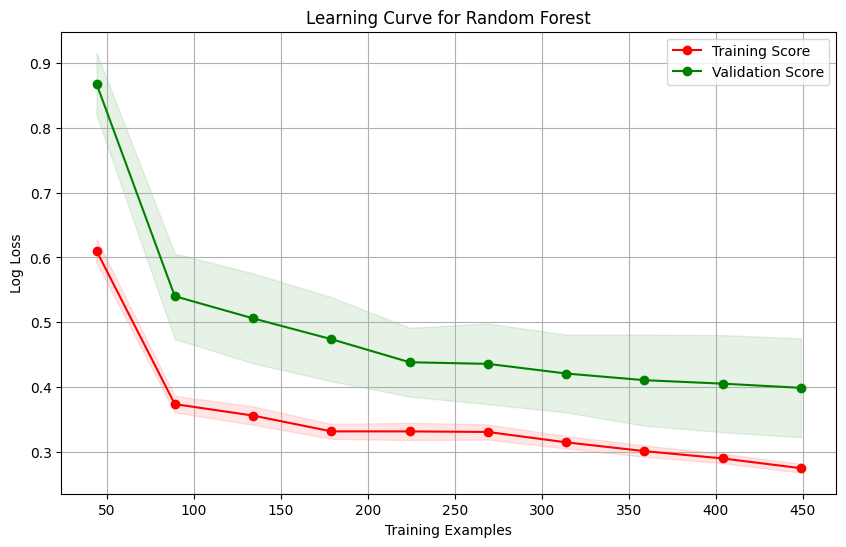

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, log_loss

# Define the objective function
def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 200),  # Range: 50 to 100
        'max_depth': trial.suggest_int('max_depth', 6, 10),  # Range: 3 to 7
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),  # Range: 10 to 20
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 8, 12),  # Range: 5 to 10
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None]),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.5, 0.6]),
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0.005, 0.02, log=True)  # Range: 0.01 to 0.5 (log scale)
    }

    # Create the model
    model = RandomForestClassifier(random_state=42, **params)

    # Stratified K-Fold Cross-Validation to ensure balanced class distribution
    stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Perform cross-validation and compute log loss
    log_loss_score = -cross_val_score(model, X_train_pca, y_train, cv=stratified_kfold, scoring='neg_log_loss').mean()

    # Store the model and parameters in the trial object
    trial.set_user_attr('model', model)
    trial.set_user_attr('params', params)

    return log_loss_score  # Minimize log loss

# Create an Optuna study
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=50)

# Print the best parameters
print("Best parameters:", study.best_params)

# Retrieve the best model
best_model = study.best_trial.user_attrs['model']

# Fit the best model on the full training data
best_model.fit(X_train_pca, y_train)

# Predictions
y_train_pred = best_model.predict(X_train_pca)
y_val_pred = best_model.predict(X_val_pca)
y_test_pred = best_model.predict(X_test_pca)

# Classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Compute log loss (using predicted probabilities)
train_loss = log_loss(y_train, best_model.predict_proba(X_train_pca))
val_loss = log_loss(y_val, best_model.predict_proba(X_val_pca))
test_loss = log_loss(y_test, best_model.predict_proba(X_test_pca))

# Print log loss
print("\nTraining Log Loss:", train_loss)
print("Validation Log Loss:", val_loss)
print("Test Log Loss:", test_loss)

# Plot learning curves
def plot_learning_curve(estimator, X, y, cv, title="Learning Curve"):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='neg_log_loss', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Convert scores to positive values (since learning_curve returns negative log loss)
    train_scores = -train_scores
    val_scores = -val_scores

    # Calculate mean and standard deviation
    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    val_scores_mean = val_scores.mean(axis=1)
    val_scores_std = val_scores.std(axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Log Loss")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation Score")

    plt.legend(loc="best")
    plt.show()

# Plot learning curves for the best model
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
plot_learning_curve(best_model, X_train_pca, y_train, cv=stratified_kfold, title="Learning Curve for Random Forest")

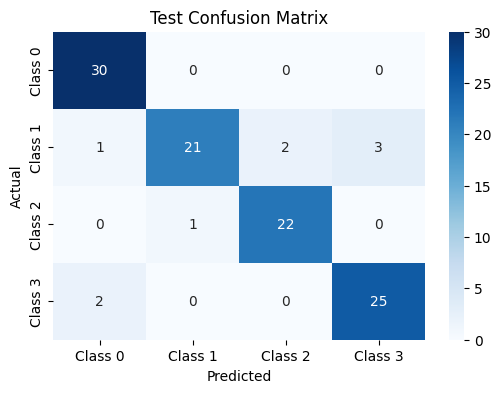

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrices for training, validation, and test sets
test_cm = confusion_matrix(y_test, y_test_pred)


# Function to plot confusion matrix as heatmap
def plot_confusion_matrix(cm, labels, title='Confusion Matrix'):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Define class labels (assuming you have 4 classes)
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

plot_confusion_matrix(test_cm, labels, title='Test Confusion Matrix')

In [ ]:
#save the model joblib
joblib.dump(best_model, 'best_model.joblib')

['best_model.joblib']

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, log_loss

# Define the objective function
def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 200),  # Range: 50 to 100
        'max_depth': trial.suggest_int('max_depth', 6, 10),  # Range: 3 to 7
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 10),  # Range: 10 to 20
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 10),  # Range: 5 to 10
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None]),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 0.5]),
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0.01, 0.1, log=True)  # Range: 0.01 to 0.5 (log scale)
    }

    # Create the model
    model = RandomForestClassifier(random_state=42, **params)

    # Stratified K-Fold Cross-Validation to ensure balanced class distribution
    stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Perform cross-validation and compute log loss
    log_loss_score = -cross_val_score(model, X_train_pca, y_train, cv=stratified_kfold, scoring='neg_log_loss').mean()

    # Store the model and parameters in the trial object
    trial.set_user_attr('model', model)
    trial.set_user_attr('params', params)

    return log_loss_score  # Minimize log loss

# Create an Optuna study
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=50)

# Print the best parameters
print("Best parameters:", study.best_params)

# Retrieve the best model
best_model = study.best_trial.user_attrs['model']

# Fit the best model on the full training data
best_model.fit(X_train_pca, y_train)

# Predictions
y_train_pred = best_model.predict(X_train_pca)
y_val_pred = best_model.predict(X_val_pca)
y_test_pred = best_model.predict(X_test_pca)

# Classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Compute log loss (using predicted probabilities)
train_loss = log_loss(y_train, best_model.predict_proba(X_train_pca))
val_loss = log_loss(y_val, best_model.predict_proba(X_val_pca))
test_loss = log_loss(y_test, best_model.predict_proba(X_test_pca))

# Print log loss
print("\nTraining Log Loss:", train_loss)
print("Validation Log Loss:", val_loss)
print("Test Log Loss:", test_loss)

[I 2025-03-16 01:31:20,600] A new study created in memory with name: no-name-92140116-3fc6-4779-9ed6-31a46a6c9f20
[I 2025-03-16 01:31:32,634] Trial 0 finished with value: 0.43709444370930656 and parameters: {'n_estimators': 144, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 6, 'class_weight': 'balanced', 'max_features': 0.5, 'ccp_alpha': 0.020152711808908822}. Best is trial 0 with value: 0.43709444370930656.
[I 2025-03-16 01:31:38,931] Trial 1 finished with value: 0.5118492535908037 and parameters: {'n_estimators': 109, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 7, 'class_weight': None, 'max_features': 0.5, 'ccp_alpha': 0.056868488113072095}. Best is trial 0 with value: 0.43709444370930656.
[I 2025-03-16 01:31:44,046] Trial 2 finished with value: 0.4290495381745501 and parameters: {'n_estimators': 115, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 7, 'class_weight': 'balanced', 'max_features': 0.5, 'ccp_alpha': 0.013850291147963009}. Best i

Best parameters: {'n_estimators': 156, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 5, 'class_weight': None, 'max_features': 0.5, 'ccp_alpha': 0.010047379800796986}

Training Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       138
           1       0.93      0.85      0.89       130
           2       0.92      0.94      0.93       106
           3       0.87      0.93      0.90       125

    accuracy                           0.92       499
   macro avg       0.92      0.92      0.92       499
weighted avg       0.92      0.92      0.92       499


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.95      0.68      0.79        28
           2       0.84      0.91      0.88        23
           3       0.81      0.93      0.86        27

    accuracy                           0.87 

# Tuning XGBoost Using GridSearchCV

In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, log_loss

# Define the objective function
def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),  # Trees in the ensemble
        'max_depth': trial.suggest_int('max_depth', 3, 10),  # Tree depth
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),  # Step size
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),  # Row sampling
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),  # Feature sampling
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),  # L1 Regularization
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),  # L2 Regularization
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),  # Minimum loss reduction to make a split
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    # Create the XGBoost model
    model = XGBClassifier(random_state=42, **params)

    # Stratified K-Fold Cross-Validation
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation and compute log loss
    log_loss_score = -cross_val_score(model, X_train_pca, y_train, cv=stratified_kfold, scoring='neg_log_loss').mean()

    trial.set_user_attr('model', model)
    trial.set_user_attr('params', params)

    return log_loss_score  # Minimize log loss

# Create an Optuna study
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=30)

# Print the best parameters
print("Best parameters:", study.best_params)

# Retrieve the best model
best_model = study.best_trial.user_attrs['model']

# Fit the best model on the full training data
best_model.fit(X_train_pca, y_train)

# Predictions
y_train_pred = best_model.predict(X_train_pca)
y_val_pred = best_model.predict(X_val_pca)
y_test_pred = best_model.predict(X_test_pca)

# Classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Compute log loss
train_loss = log_loss(y_train, best_model.predict_proba(X_train_pca))
val_loss = log_loss(y_val, best_model.predict_proba(X_val_pca))
test_loss = log_loss(y_test, best_model.predict_proba(X_test_pca))

# Print log loss
print("\nTraining Log Loss:", train_loss)
print("Validation Log Loss:", val_loss)
print("Test Log Loss:", test_loss)


[I 2025-03-16 00:07:10,168] A new study created in memory with name: no-name-43a74a62-59ea-41c7-813a-535f717e9ee2
[I 2025-03-16 00:07:12,035] Trial 0 finished with value: 0.3702452851069052 and parameters: {'n_estimators': 91, 'max_depth': 3, 'learning_rate': 0.0653343332702063, 'subsample': 0.7777194614337404, 'colsample_bytree': 0.9271627192668576, 'reg_alpha': 0.44722680205009147, 'reg_lambda': 0.649729473441933, 'gamma': 0.02363183861949747}. Best is trial 0 with value: 0.3702452851069052.
[I 2025-03-16 00:07:15,563] Trial 1 finished with value: 0.3806936819747551 and parameters: {'n_estimators': 83, 'max_depth': 9, 'learning_rate': 0.15736397885363085, 'subsample': 0.7981346977821382, 'colsample_bytree': 0.6706841769506586, 'reg_alpha': 0.28446305976316266, 'reg_lambda': 0.4134066344827273, 'gamma': 0.12963330857305438}. Best is trial 0 with value: 0.3702452851069052.
[I 2025-03-16 00:07:19,080] Trial 2 finished with value: 0.4848172459615217 and parameters: {'n_estimators': 124, 

Best parameters: {'n_estimators': 68, 'max_depth': 6, 'learning_rate': 0.12632102607518045, 'subsample': 0.941772306137449, 'colsample_bytree': 0.7417044033458161, 'reg_alpha': 0.4821280581233544, 'reg_lambda': 0.00905940234896363, 'gamma': 0.3784992969542132}

Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       138
           1       1.00      1.00      1.00       130
           2       1.00      1.00      1.00       106
           3       1.00      0.99      1.00       125

    accuracy                           1.00       499
   macro avg       1.00      1.00      1.00       499
weighted avg       1.00      1.00      1.00       499


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.95      0.68      0.79        28
           2       0.78      0.91      0.84        23
           3       

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, log_loss
from xgboost import XGBClassifier
import numpy as np

# Define hyperparameter distribution
param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 10, 2),
    'min_child_weight': np.arange(1, 10, 2),
    'gamma': np.linspace(0, 0.5, 5),
    'subsample': np.linspace(0.5, 1.0, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5),
    'reg_lambda': np.linspace(0, 5, 5),
    'reg_alpha': np.linspace(0, 5, 5)
}

# Initialize XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_pca, y_train)

# Print best parameters and validation accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Validation Accuracy:", random_search.best_score_)

# Use the best model
best_xgb = random_search.best_estimator_

# Predict on train, validation, and test sets
y_train_pred = best_xgb.predict(X_train_pca)
y_val_pred = best_xgb.predict(X_val_pca)


# Compute log loss
train_loss = log_loss(y_train, best_xgb.predict_proba(X_train_pca))
val_loss = log_loss(y_val, best_xgb.predict_proba(X_val_pca))

# Print classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))


# Print log loss
print("\nTraining Log Loss:", train_loss)
print("Validation Log Loss:", val_loss)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.75, 'reg_lambda': 2.5, 'reg_alpha': 2.5, 'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.2677777777777778, 'gamma': 0.25, 'colsample_bytree': 0.625}
Best Validation Accuracy: 0.8798989898989898

Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       138
           1       0.98      0.95      0.97       130
           2       0.98      0.97      0.98       106
           3       0.95      0.98      0.97       125

    accuracy                           0.97       499
   macro avg       0.97      0.97      0.97       499
weighted avg       0.97      0.97      0.97       499


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.95      0.71      0.82        28
           2  

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Adjusted hyperparameters to reduce overfitting
param_grid = {
    'n_estimators': [200, 250],  # Fewer trees
    'learning_rate': [0.01, 0.02],
    'max_depth': [3, 4],  # Lower depth
    'subsample': [0.7, 0.8],  # Less reliance on full data
    'reg_lambda': [1, 2],  # L2 regularization
    'reg_alpha': [0.5, 1]  # L1 regularization
}

# Initialize XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# Predictions
y_train_pred = best_xgb.predict(X_train_pca)
y_val_pred = best_xgb.predict(X_val_pca)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Best Validation Accuracy:", grid_search.best_score_)

print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters: {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 2, 'subsample': 0.7}
Best Validation Accuracy: 0.8737585070822211

Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       138
           1       0.97      0.92      0.94       130
           2       0.97      0.97      0.97       106
           3       0.93      0.97      0.95       125

    accuracy                           0.96       499
   macro avg       0.96      0.96      0.96       499
weighted avg       0.96      0.96      0.96       499


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.90      0.68      0.78        28
           2       0.78      0.91      0.84        23
           3       0.83      0.93      0.88 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, log_loss
from xgboost import XGBClassifier
import numpy as np

# Define hyperparameter distribution
param_dist = {
    'n_estimators': np.arange(100, 1000, 50),
    'learning_rate': np.linspace(0.01, 0.5, 20),
    'max_depth': np.arange(3, 12, 1),
    'min_child_weight': np.arange(1, 15, 2),
    'gamma': np.linspace(0, 1, 6),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'reg_lambda': np.linspace(0, 10, 6),
    'reg_alpha': np.linspace(0, 10, 6),
    'scale_pos_weight': [1, 2, 5]  # Add this if dealing with class imbalance
}

# Initialize XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Initialize RandomizedSearchCV with more iterations and folds
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,  # Increase iterations
    scoring='accuracy',
    cv=10,  # More cross-validation folds
    verbose=2,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_pca, y_train)

# Print best parameters and validation accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Validation Accuracy:", random_search.best_score_)

# Use the best model
best_xgb = random_search.best_estimator_

# Predict on train, validation, and test sets
y_train_pred = best_xgb.predict(X_train_pca)
y_val_pred = best_xgb.predict(X_val_pca)
y_test_pred = best_xgb.predict(X_test_pca)

# Compute log loss
train_loss = log_loss(y_train, best_xgb.predict_proba(X_train_pca))
val_loss = log_loss(y_val, best_xgb.predict_proba(X_val_pca))
test_loss = log_loss(y_test, best_xgb.predict_proba(X_test_pca))

# Print classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print log loss
print("\nTraining Log Loss:", train_loss)
print("Validation Log Loss:", val_loss)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters: {'subsample': np.float64(0.9), 'scale_pos_weight': 5, 'reg_lambda': np.float64(6.0), 'reg_alpha': np.float64(2.0), 'n_estimators': np.int64(100), 'min_child_weight': np.int64(1), 'max_depth': np.int64(8), 'learning_rate': np.float64(0.26789473684210524), 'gamma': np.float64(0.4), 'colsample_bytree': np.float64(0.6)}
Best Validation Accuracy: 0.882

Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       138
           1       0.97      0.93      0.95       130
           2       0.97      0.96      0.97       106
           3       0.94      0.98      0.96       125

    accuracy                           0.96       499
   macro avg       0.96      0.96      0.96       499
weighted avg       0.96      0.96      0.96       499


Validation Classification Report:
              precision    recall  f1-score   support

          

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, log_loss
from xgboost import XGBClassifier
import numpy as np

# Define hyperparameter distribution with stricter regularization and reduced complexity
param_dist = {
    'n_estimators': np.arange(200, 600, 50),
    'learning_rate': np.linspace(0.05, 0.2, 10),
    'max_depth': np.arange(5, 9, 1),
    'min_child_weight': np.arange(3, 10, 2),
    'gamma': np.linspace(0.2, 0.8, 6),
    'subsample': np.linspace(0.6, 0.9, 6),
    'colsample_bytree': np.linspace(0.5, 0.8, 6),
    'reg_lambda': np.linspace(5, 20, 6),
    'reg_alpha': np.linspace(5, 20, 6),
    'scale_pos_weight': [1, 2, 5]
}

# Initialize XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Initialize RandomizedSearchCV with more iterations and folds
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,  # Increase iterations
    scoring='accuracy',
    cv=10,  # More cross-validation folds
    verbose=2,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_pca, y_train)

# Print best parameters and validation accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Validation Accuracy:", random_search.best_score_)

# Use the best model
best_xgb = random_search.best_estimator_

# Predict on train, validation, and test sets
y_train_pred = best_xgb.predict(X_train_pca)
y_val_pred = best_xgb.predict(X_val_pca)
y_test_pred = best_xgb.predict(X_test_pca)

# Compute log loss
train_loss = log_loss(y_train, best_xgb.predict_proba(X_train_pca))
val_loss = log_loss(y_val, best_xgb.predict_proba(X_val_pca))
test_loss = log_loss(y_test, best_xgb.predict_proba(X_test_pca))

# Print classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print log loss
print("\nTraining Log Loss:", train_loss)
print("Validation Log Loss:", val_loss)
print("Test Log Loss:", test_loss)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters: {'subsample': np.float64(0.72), 'scale_pos_weight': 1, 'reg_lambda': np.float64(8.0), 'reg_alpha': np.float64(20.0), 'n_estimators': np.int64(400), 'min_child_weight': np.int64(3), 'max_depth': np.int64(8), 'learning_rate': np.float64(0.16666666666666669), 'gamma': np.float64(0.6800000000000002), 'colsample_bytree': np.float64(0.62)}
Best Validation Accuracy: 0.874

Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       138
           1       0.87      0.84      0.85       130
           2       0.92      0.92      0.92       106
           3       0.87      0.92      0.89       125

    accuracy                           0.90       499
   macro avg       0.90      0.90      0.90       499
weighted avg       0.90      0.90      0.90       499


Validation Classification Report:
              precision    recall  f1-score   s

In [ ]:
import joblib

# Save the best model
joblib.dump(best_rf, 'tuned_random_forest_model.pkl')

# Optionally, save the scaler if used
joblib.dump(scaler, 'scaler.pkl')

# Optionally, save the label encoder if used
joblib.dump(label_encoder, 'label_encoder.pkl')